# Block 1 — SETUP & INSTALLATIONS

This block installs and imports all the Python libraries needed to run the
Seconds Newsletter Engine. Libraries are pre-built tools that handle specific
tasks. Pandas manages data, scikit-learn runs the machine learning, faker
generates synthetic user data, and openpyxl reads Excel files. The random
seed ensures our results are consistent and reproducible every time we run
the project.

In [50]:
# BLOCK 1 — SETUP & INSTALLATIONS
# SECONDS NEWSLETTER ENGINE


# Installing required libraries
!pip install faker scikit-learn pandas openpyxl tabulate

# Importing everything we need
import pandas as pd
import numpy as np
from faker import Faker
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import random
import datetime
import warnings
warnings.filterwarnings('ignore')

# Setting random seed so results are consistent every time
random.seed(42)
np.random.seed(42)

print("Phase 1 Complete — All libraries installed and imported successfully!")
print("Libraries ready: pandas, numpy, faker, sklearn, openpyxl, tabulate")
print("Seconds Newsletter Engine is ready to build")

Phase 1 Complete — All libraries installed and imported successfully!
Libraries ready: pandas, numpy, faker, sklearn, openpyxl, tabulate
Seconds Newsletter Engine is ready to build


# Block 2

This block uploads and reads the Seconds company calendar — a full year of
52 Fridays, each pre-loaded with content keywords. The system scans every
cell in the Excel file, identifies Friday entries, and extracts the date and
keywords for each one. The result is a clean, structured dataset of every
Friday in 2026 and what content is planned for that week.

In [51]:
# BLOCK 2 — LOAD THE COMPANY CALENDAR

from google.colab import files
print("📂 Please upload your file: Seconds_Company_Calendar.xlsx")
uploaded = files.upload()

# Reading the Excel file
calendar_df = pd.read_excel('Seconds_Company_Calendar.xlsx', header=0)

# The calendar has months as columns, dates as rows
# We need to extract ONLY the Friday entries with their keywords

friday_data = []

# Going through every cell in the calendar
for col in calendar_df.columns:
    for cell in calendar_df[col].dropna():
        cell = str(cell).strip()
        # Only process cells that contain "Friday"
        if 'Friday' in cell and ':' in cell:
            # Split into date part and keywords part
            parts = cell.split(':', 1)
            date_part = parts[0].strip()  # e.g. "2 January - Friday"
            keywords_raw = parts[1].strip()  # e.g. "New Year, 1 Week Sale, New Arrivals"

            # Extracting keywords as a clean list
            keywords = [k.strip() for k in keywords_raw.split(',') if k.strip()]

            # Extracting day and month
            date_parts = date_part.split()
            day = int(date_parts[0])
            month = date_parts[1]

            # Converting month name to number
            month_num = datetime.datetime.strptime(month, "%B").month
            year = 2026

            # Building actual date
            try:
                actual_date = datetime.date(year, month_num, day)
                friday_data.append({
                    'Date': actual_date,
                    'Date_Label': date_part,
                    'Keywords': keywords,
                    'Keywords_Raw': keywords_raw
                })
            except:
                pass

# Creating clean dataframe of all Fridays
fridays_df = pd.DataFrame(friday_data)
fridays_df = fridays_df.sort_values('Date').reset_index(drop=True)

# Displaying results
print(f"Phase 2 Complete — Calendar loaded successfully!")
print(f"Total Fridays found: {len(fridays_df)}")
print(f"All Fridays in the Seconds Calendar:\n")

for _, row in fridays_df.iterrows():
    print(f"  {row['Date']} → {', '.join(row['Keywords'])}")

📂 Please upload your file: Seconds_Company_Calendar.xlsx


Saving Seconds_Company_Calendar.xlsx to Seconds_Company_Calendar (5).xlsx
Phase 2 Complete — Calendar loaded successfully!
Total Fridays found: 52
All Fridays in the Seconds Calendar:

  2026-01-02 → New Year, 1 Week Sale, New Arrivals
  2026-01-09 → New Year, Sign Up Discount, New Arrivals
  2026-01-16 → Sign Up Discount, Flash Sale, Exclusive Discount
  2026-01-23 → Sign Up Discount, Flash Sale, Restock
  2026-01-30 → Sign Up Discount, Winter End Sale
  2026-02-06 → Winter End Sale
  2026-02-13 → Spring, Valentine's Day, 7 Day Sale
  2026-02-20 → Ramadan Wish, International Mother Language Day, 21% Off
  2026-02-27 → Flash Sale, New Outlet at Dhanmondi
  2026-03-06 → Ramadan, New arrivals, New Outlet at Dhanmondi
  2026-03-13 → New arrivals, New Brand Acquisition, Ramadan, Eid, 1 Week Sale, Sign Up Discount
  2026-03-20 → Eid Wish, Referral, New Arrivals
  2026-03-27 → Sign Up Discount, About Company, Dress Watch
  2026-04-03 → Easter Sunday Wish, Sign Up Discount, About Company
  20

# Block 3A — BUILDING THE 1000 USER DATABASE

This block generates a synthetic database of 1000 Seconds customers. Each
user has a unique ID, name, email, region across Bangladesh, and a device
type. Most importantly, each user has 9 digital behavior metrics — clicks,
website visits, cart additions, newsletter engagement, read time, purchase
history, email open rate, subscription age, and unsubscribe risk. Users are
generated across 4 realistic behavioral profiles — highly engaged, moderately
engaged, low engaged, and dormant — reflecting real-world customer patterns
for a growing Bangladeshi brand.

In [52]:
# BLOCK 3A — BUILD THE 1000 USER DATABASE

fake = Faker()

regions = {
    'Dhaka'       : 35,
    'Chittagong'  : 20,
    'Sylhet'      : 10,
    'Rajshahi'    : 10,
    'Khulna'      : 8,
    'Cumilla'     : 7,
    'Mymensingh'  : 5,
    'Barishal'    : 5
}

region_pool = []
for region, weight in regions.items():
    region_pool.extend([region] * weight)

# Device types — Bangladesh is mobile-first
device_types = ['Mobile', 'Mobile', 'Mobile', 'Desktop', 'Tablet']

# Subscription age in months — how long they've been subscribed
# Affects behavior patterns

def generate_user_behavior(profile):
    """
    Generate realistic digital behavior based on user profile type.
    Profile types: 'highly_engaged', 'moderately_engaged', 'low_engaged', 'dormant'
    This creates natural clusters for ML to discover in Block 4.
    """
    if profile == 'highly_engaged':
        return {
            'Clicks_Last_30_Days'              : random.randint(40, 80),
            'Website_Visits_Last_30_Days'      : random.randint(30, 60),
            'Add_To_Cart_Last_30_Days'         : random.randint(10, 20),
            'Newsletter_Clicks_Last_30_Days'   : random.randint(15, 30),
            'Avg_Read_Time_Seconds'            : round(random.uniform(90, 180), 1),
            'Purchase_Last_90_Days'            : random.randint(2, 6),
            'Email_Open_Rate'                  : round(random.uniform(0.60, 0.95), 2),
            'Subscription_Age_Months'          : random.randint(12, 36),
            'Unsubscribe_Risk_Score'           : round(random.uniform(0.01, 0.15), 2),
        }
    elif profile == 'moderately_engaged':
        return {
            'Clicks_Last_30_Days'              : random.randint(15, 39),
            'Website_Visits_Last_30_Days'      : random.randint(10, 29),
            'Add_To_Cart_Last_30_Days'         : random.randint(3, 9),
            'Newsletter_Clicks_Last_30_Days'   : random.randint(5, 14),
            'Avg_Read_Time_Seconds'            : round(random.uniform(45, 89), 1),
            'Purchase_Last_90_Days'            : random.randint(1, 3),
            'Email_Open_Rate'                  : round(random.uniform(0.30, 0.59), 2),
            'Subscription_Age_Months'          : random.randint(6, 18),
            'Unsubscribe_Risk_Score'           : round(random.uniform(0.15, 0.40), 2),
        }
    elif profile == 'low_engaged':
        return {
            'Clicks_Last_30_Days'              : random.randint(3, 14),
            'Website_Visits_Last_30_Days'      : random.randint(2, 9),
            'Add_To_Cart_Last_30_Days'         : random.randint(0, 2),
            'Newsletter_Clicks_Last_30_Days'   : random.randint(1, 4),
            'Avg_Read_Time_Seconds'            : round(random.uniform(15, 44), 1),
            'Purchase_Last_90_Days'            : random.randint(0, 1),
            'Email_Open_Rate'                  : round(random.uniform(0.10, 0.29), 2),
            'Subscription_Age_Months'          : random.randint(3, 12),
            'Unsubscribe_Risk_Score'           : round(random.uniform(0.40, 0.65), 2),
        }
    else:  # dormant
        return {
            'Clicks_Last_30_Days'              : random.randint(0, 2),
            'Website_Visits_Last_30_Days'      : random.randint(0, 1),
            'Add_To_Cart_Last_30_Days'         : 0,
            'Newsletter_Clicks_Last_30_Days'   : random.randint(0, 1),
            'Avg_Read_Time_Seconds'            : round(random.uniform(0, 14), 1),
            'Purchase_Last_90_Days'            : 0,
            'Email_Open_Rate'                  : round(random.uniform(0.00, 0.09), 2),
            'Subscription_Age_Months'          : random.randint(1, 6),
            'Unsubscribe_Risk_Score'           : round(random.uniform(0.65, 0.99), 2),
        }

# Profile distribution across 1000 users — realistic for a growing Bangladeshi brand
profile_distribution = (
    ['highly_engaged']      * 127 +
    ['moderately_engaged']  * 242 +
    ['low_engaged']         * 331 +
    ['dormant']             * 300
)
random.shuffle(profile_distribution)

# Generate all 1000 users
users = []
for i in range(1, 1001):
    profile  = profile_distribution[i - 1]
    behavior = generate_user_behavior(profile)

    user = {
        'User_ID'      : f'SEC{i:04d}',
        'First_Name'   : fake.first_name(),
        'Last_Name'    : fake.last_name(),
        'Email'        : f'user{i}@seconds.com.bd',
        'Region'       : random.choice(region_pool),
        'Device_Type'  : random.choice(device_types),
        'True_Profile' : profile,   # we keep this for validation later
    }
    user.update(behavior)
    users.append(user)

users_df = pd.DataFrame(users)

print("✅ Block 3A Complete — 1000 User Database Generated!")
print(f"👥 Total Users: {len(users_df)}")
print(f"\n📊 Regional Distribution:")
print(users_df['Region'].value_counts().to_string())
print(f"\n📱 Device Type Distribution:")
print(users_df['Device_Type'].value_counts().to_string())
print(f"\n🎭 Underlying Profile Distribution (for validation):")
print(users_df['True_Profile'].value_counts().to_string())
print(f"\n📈 Full Behavioral Data Summary:")
print(users_df[['Clicks_Last_30_Days',
                 'Website_Visits_Last_30_Days',
                 'Add_To_Cart_Last_30_Days',
                 'Newsletter_Clicks_Last_30_Days',
                 'Avg_Read_Time_Seconds',
                 'Purchase_Last_90_Days',
                 'Email_Open_Rate',
                 'Unsubscribe_Risk_Score']].describe().round(2).to_string())

✅ Block 3A Complete — 1000 User Database Generated!
👥 Total Users: 1000

📊 Regional Distribution:
Region
Dhaka         356
Chittagong    201
Rajshahi       92
Sylhet         88
Khulna         84
Cumilla        76
Barishal       54
Mymensingh     49

📱 Device Type Distribution:
Device_Type
Mobile     593
Tablet     210
Desktop    197

🎭 Underlying Profile Distribution (for validation):
True_Profile
low_engaged           331
dormant               300
moderately_engaged    242
highly_engaged        127

📈 Full Behavioral Data Summary:
       Clicks_Last_30_Days  Website_Visits_Last_30_Days  Add_To_Cart_Last_30_Days  Newsletter_Clicks_Last_30_Days  Avg_Read_Time_Seconds  Purchase_Last_90_Days  Email_Open_Rate  Unsubscribe_Risk_Score
count              1000.00                      1000.00                   1000.00                         1000.00                1000.00                1000.00          1000.00                 1000.00
mean                 17.63                        12.47     

# BLOCK 3B — EXPLORATORY DATA ANALYSIS (EDA)

Before applying machine learning, we first explore and visualise the user
database to understand its structure and patterns. This stage — known as
Exploratory Data Analysis — produces 5 professional charts covering
behavioral distributions, profile breakdowns by region, key metric
comparisons across profiles, a behavioral correlation matrix, and device
and regional insights. EDA ensures our data is healthy, realistic, and
ready for ML processing.

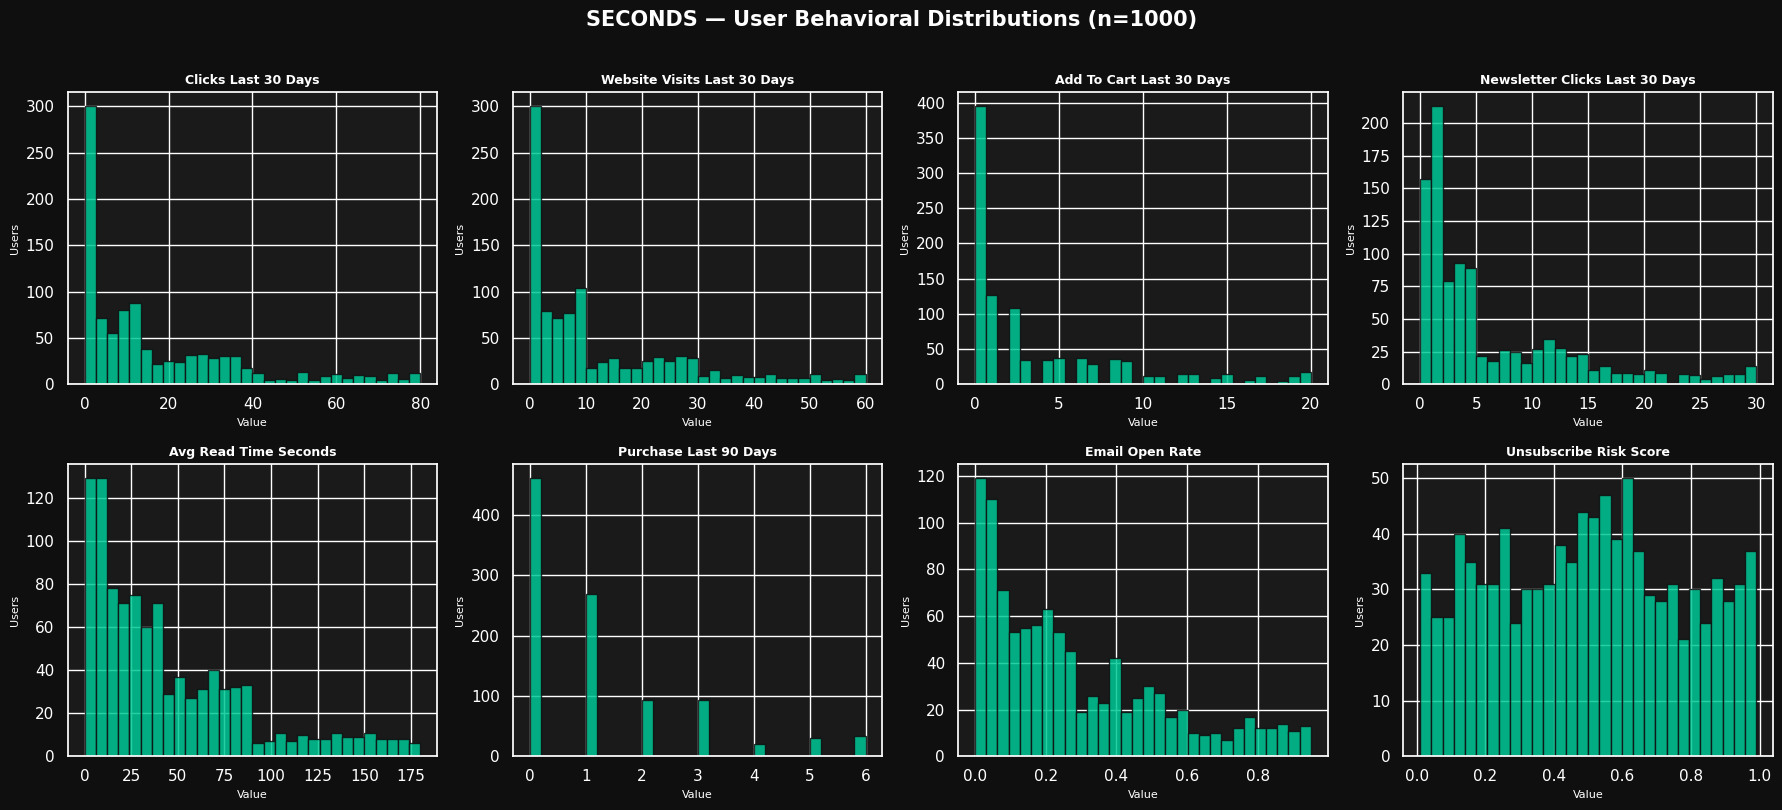

📊 Figure 1 — Behavioral Distributions rendered


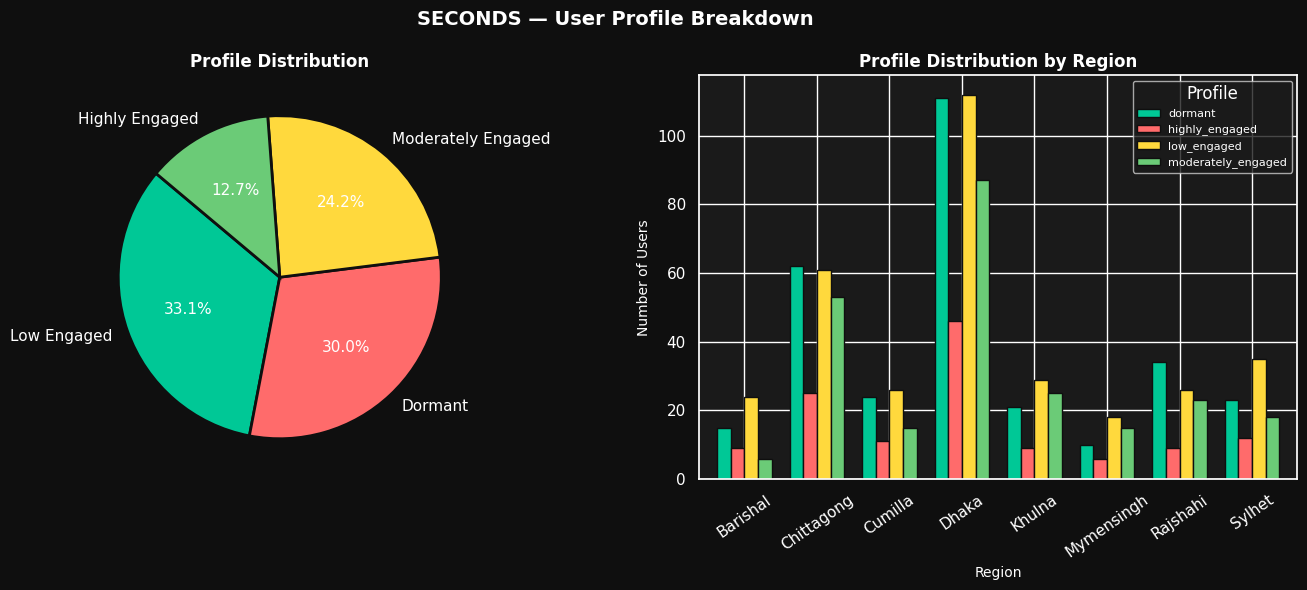

📊 Figure 2 — Profile Breakdown rendered


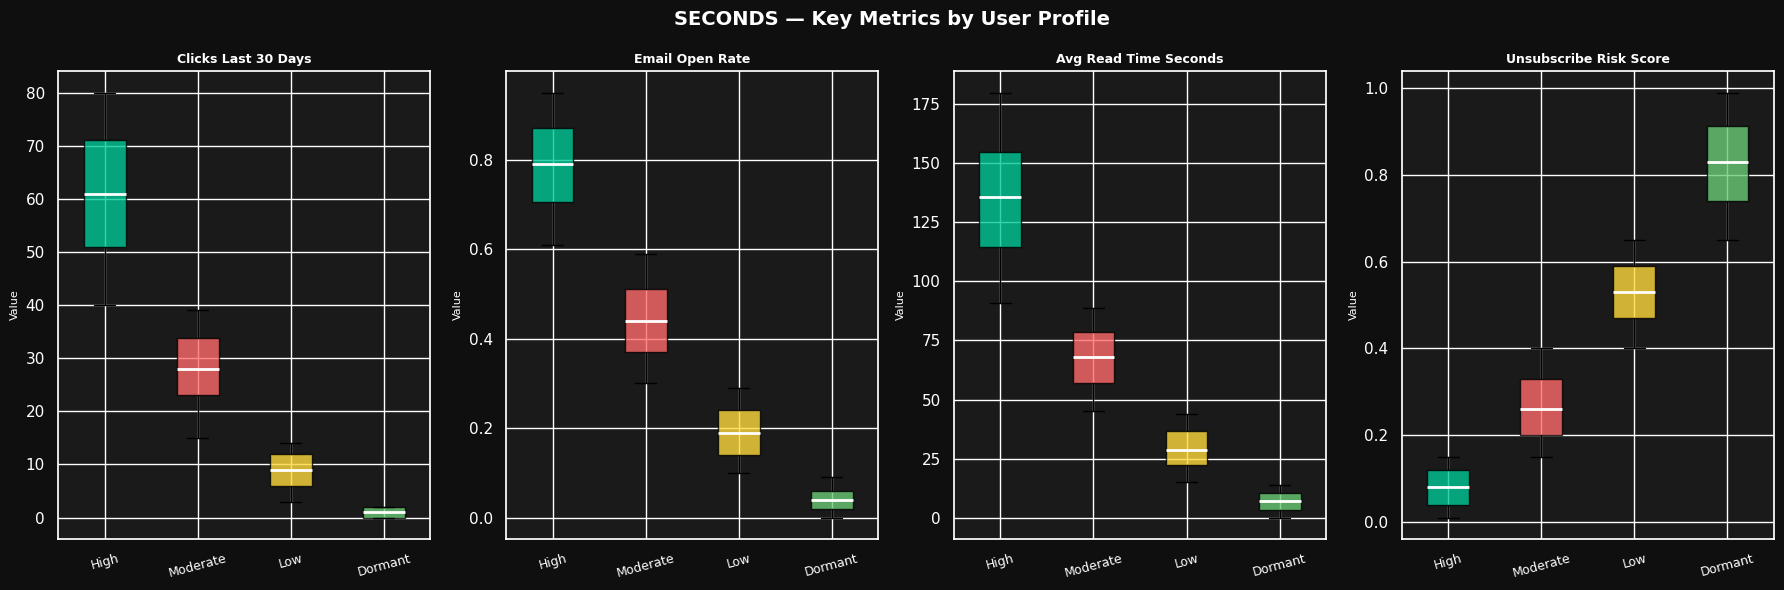

📊 Figure 3 — Box Plots rendered


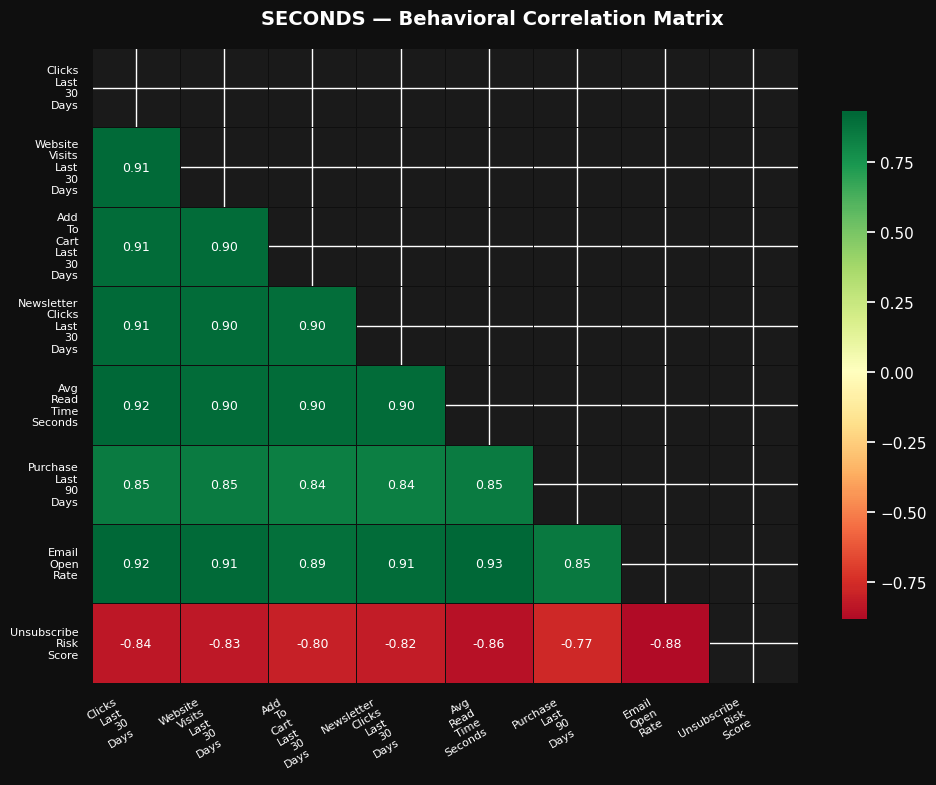

📊 Figure 4 — Correlation Heatmap rendered


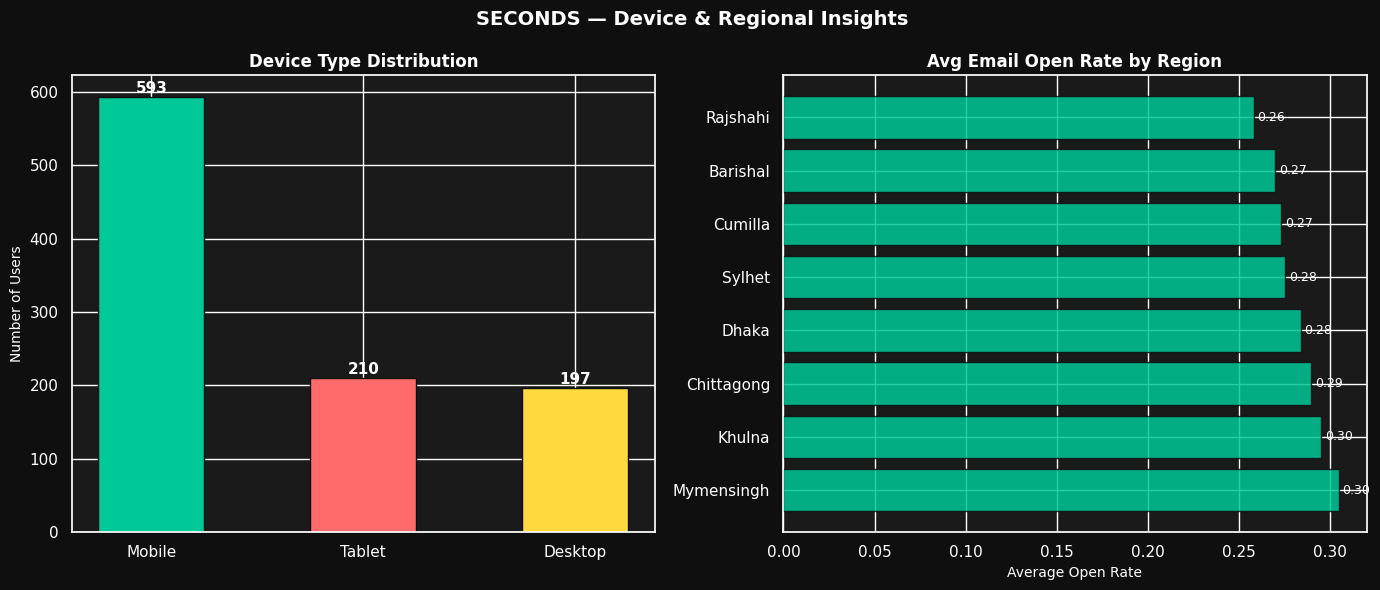

📊 Figure 5 — Device & Regional Insights rendered

     SECONDS USER DATABASE — EDA SUMMARY
  Total Users          : 1,000
  Regions Covered      : 8
  Device Types         : 3
  Avg Email Open Rate  : 28.2%
  Avg Read Time        : 45.2 seconds
  Avg Purchases/90days : 1.2
  High Risk of Unsub   : 298 users


In [53]:
# BLOCK 3B — EXPLORATORY DATA ANALYSIS (EDA)
# Understanding our users first

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Set visual style
sns.set_theme(style="darkgrid")
plt.rcParams['figure.facecolor'] = '#0f0f0f'
plt.rcParams['axes.facecolor']   = '#1a1a1a'
plt.rcParams['axes.labelcolor']  = 'white'
plt.rcParams['xtick.color']      = 'white'
plt.rcParams['ytick.color']      = 'white'
plt.rcParams['text.color']       = 'white'
plt.rcParams['axes.titlecolor']  = 'white'

ACCENT   = '#00C896'  # Seconds brand green
ACCENT2  = '#FF6B6B'  # warm red
ACCENT3  = '#FFD93D'  # yellow
ACCENT4  = '#6BCB77'  # soft green
COLORS   = [ACCENT, ACCENT2, ACCENT3, ACCENT4]

behavior_cols = [
    'Clicks_Last_30_Days',
    'Website_Visits_Last_30_Days',
    'Add_To_Cart_Last_30_Days',
    'Newsletter_Clicks_Last_30_Days',
    'Avg_Read_Time_Seconds',
    'Purchase_Last_90_Days',
    'Email_Open_Rate',
    'Unsubscribe_Risk_Score'
]

# ── FIGURE 1: Overall Behavioral Distributions ──────────────
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
fig.suptitle('SECONDS — User Behavioral Distributions (n=1000)',
             fontsize=15, fontweight='bold', color='white', y=1.01)

for ax, col in zip(axes.flatten(), behavior_cols):
    ax.hist(users_df[col], bins=30, color=ACCENT, edgecolor='#0f0f0f', alpha=0.85)
    ax.set_title(col.replace('_', ' '), fontsize=9, fontweight='bold')
    ax.set_xlabel('Value', fontsize=8)
    ax.set_ylabel('Users',  fontsize=8)

plt.tight_layout()
plt.savefig('fig1_distributions.png', dpi=150, bbox_inches='tight',
            facecolor='#0f0f0f')
plt.show()
print("📊 Figure 1 — Behavioral Distributions rendered")


# ── FIGURE 2: Profile Breakdown ──────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('SECONDS — User Profile Breakdown',
             fontsize=14, fontweight='bold', color='white')

# Pie chart
profile_counts = users_df['True_Profile'].value_counts()
axes[0].pie(
    profile_counts,
    labels=[p.replace('_', ' ').title() for p in profile_counts.index],
    colors=COLORS,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'color': 'white', 'fontsize': 11},
    wedgeprops={'edgecolor': '#0f0f0f', 'linewidth': 2}
)
axes[0].set_title('Profile Distribution', fontweight='bold')

# Bar chart by region
region_profile = users_df.groupby(['Region', 'True_Profile']).size().unstack(fill_value=0)
region_profile.plot(kind='bar', ax=axes[1], color=COLORS, edgecolor='#0f0f0f',
                    width=0.75)
axes[1].set_title('Profile Distribution by Region', fontweight='bold')
axes[1].set_xlabel('Region', fontsize=10)
axes[1].set_ylabel('Number of Users', fontsize=10)
axes[1].tick_params(axis='x', rotation=35)
axes[1].legend(title='Profile', fontsize=8,
               facecolor='#1a1a1a', labelcolor='white')

plt.tight_layout()
plt.savefig('fig2_profiles.png', dpi=150, bbox_inches='tight',
            facecolor='#0f0f0f')
plt.show()
print("📊 Figure 2 — Profile Breakdown rendered")


# ── FIGURE 3: Behavior by Profile (Box Plots) ────────────────
key_metrics = [
    'Clicks_Last_30_Days',
    'Email_Open_Rate',
    'Avg_Read_Time_Seconds',
    'Unsubscribe_Risk_Score'
]

fig, axes = plt.subplots(1, 4, figsize=(18, 6))
fig.suptitle('SECONDS — Key Metrics by User Profile',
             fontsize=14, fontweight='bold', color='white')

profile_order = ['highly_engaged', 'moderately_engaged', 'low_engaged', 'dormant']
short_labels  = ['High', 'Moderate', 'Low', 'Dormant']

for ax, metric in zip(axes, key_metrics):
    data_by_profile = [
        users_df[users_df['True_Profile'] == p][metric].values
        for p in profile_order
    ]
    bp = ax.boxplot(data_by_profile, patch_artist=True, notch=False,
                    medianprops=dict(color='white', linewidth=2))
    for patch, color in zip(bp['boxes'], COLORS):
        patch.set_facecolor(color)
        patch.set_alpha(0.8)
    ax.set_xticklabels(short_labels, fontsize=9, rotation=15)
    ax.set_title(metric.replace('_', ' '), fontsize=9, fontweight='bold')
    ax.set_ylabel('Value', fontsize=8)

plt.tight_layout()
plt.savefig('fig3_boxplots.png', dpi=150, bbox_inches='tight',
            facecolor='#0f0f0f')
plt.show()
print("📊 Figure 3 — Box Plots rendered")


# ── FIGURE 4: Correlation Heatmap ────────────────────────────
fig, ax = plt.subplots(figsize=(10, 8))
fig.suptitle('SECONDS — Behavioral Correlation Matrix',
             fontsize=14, fontweight='bold', color='white')

corr = users_df[behavior_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr, mask=mask, ax=ax,
    cmap='RdYlGn', center=0,
    annot=True, fmt='.2f', annot_kws={'size': 9},
    linewidths=0.5, linecolor='#0f0f0f',
    cbar_kws={'shrink': 0.8}
)
ax.set_xticklabels(
    [c.replace('_', '\n') for c in behavior_cols],
    fontsize=8, rotation=30, ha='right'
)
ax.set_yticklabels(
    [c.replace('_', '\n') for c in behavior_cols],
    fontsize=8, rotation=0
)

plt.tight_layout()
plt.savefig('fig4_correlation.png', dpi=150, bbox_inches='tight',
            facecolor='#0f0f0f')
plt.show()
print("📊 Figure 4 — Correlation Heatmap rendered")


# ── FIGURE 5: Device & Region Insights ───────────────────────
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('SECONDS — Device & Regional Insights',
             fontsize=14, fontweight='bold', color='white')

# Device distribution
device_counts = users_df['Device_Type'].value_counts()
axes[0].bar(device_counts.index, device_counts.values,
            color=[ACCENT, ACCENT2, ACCENT3], edgecolor='#0f0f0f', width=0.5)
axes[0].set_title('Device Type Distribution', fontweight='bold')
axes[0].set_ylabel('Number of Users', fontsize=10)
for i, v in enumerate(device_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center',
                 color='white', fontweight='bold', fontsize=11)

# Average email open rate by region
region_openrate = users_df.groupby('Region')['Email_Open_Rate'].mean().sort_values(ascending=False)
axes[1].barh(region_openrate.index, region_openrate.values,
             color=ACCENT, edgecolor='#0f0f0f', alpha=0.85)
axes[1].set_title('Avg Email Open Rate by Region', fontweight='bold')
axes[1].set_xlabel('Average Open Rate', fontsize=10)
for i, v in enumerate(region_openrate.values):
    axes[1].text(v + 0.002, i, f'{v:.2f}',
                 va='center', color='white', fontsize=9)

plt.tight_layout()
plt.savefig('fig5_device_region.png', dpi=150, bbox_inches='tight',
            facecolor='#0f0f0f')
plt.show()
print("📊 Figure 5 — Device & Regional Insights rendered")


# ── SUMMARY STATS TABLE ──────────────────────────────────────
print("\n" + "="*60)
print("     SECONDS USER DATABASE — EDA SUMMARY")
print("="*60)
print(f"  Total Users          : {len(users_df):,}")
print(f"  Regions Covered      : {users_df['Region'].nunique()}")
print(f"  Device Types         : {users_df['Device_Type'].nunique()}")
print(f"  Avg Email Open Rate  : {users_df['Email_Open_Rate'].mean():.1%}")
print(f"  Avg Read Time        : {users_df['Avg_Read_Time_Seconds'].mean():.1f} seconds")
print(f"  Avg Purchases/90days : {users_df['Purchase_Last_90_Days'].mean():.1f}")
print(f"  High Risk of Unsub   : {(users_df['Unsubscribe_Risk_Score'] > 0.65).sum()} users")
print("="*60)

# Block 4 — USER SEGMENTATION

We apply K-Means Clustering — an unsupervised ML algorithm — to group all 1000 users into natural behavioral segments. The algorithm analyses all 9 behavioral metrics simultaneously and discovers 4 natural clusters without any manual rules. The Elbow Method mathematically confirms that 4 clusters is the optimal number. The top 2 clusters by engagement score are labelled WARM and the bottom 2 are labelled COLD. PCA then visualises these clusters in 2D. The result: 369 warm users (36.9%) and 631 cold users (63.1%) — a realistic distribution for a growing Bangladeshi watch brand.

✅ Step 1 & 2 Complete — Data normalized to 0-1 scale
   Shape of ML input: (1000, 9) (1000 users × 9 features)



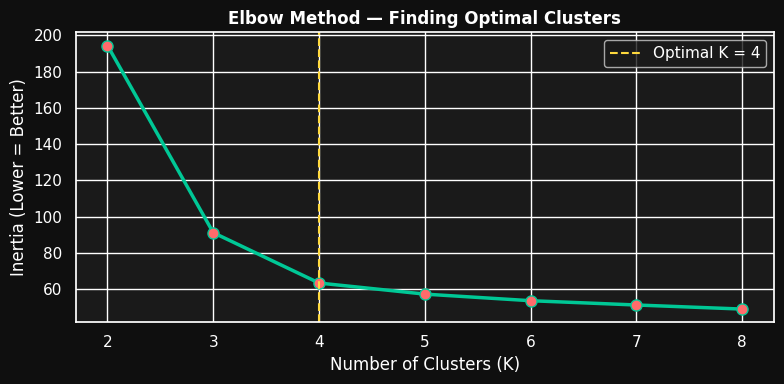

📊 Elbow Curve rendered — K=4 is our optimal cluster count

✅ Step 4 Complete — K-Means clustering done!
   Cluster distribution:
ML_Cluster
0    127
1    331
2    242
3    300

📊 Cluster Engagement Scores:
ML_Cluster
0    0.730
1    0.036
2    0.310
3   -0.101

✅ Step 5 Complete — Segments assigned!
   WARM clusters : [0, 2]
   COLD clusters : [3, 1]


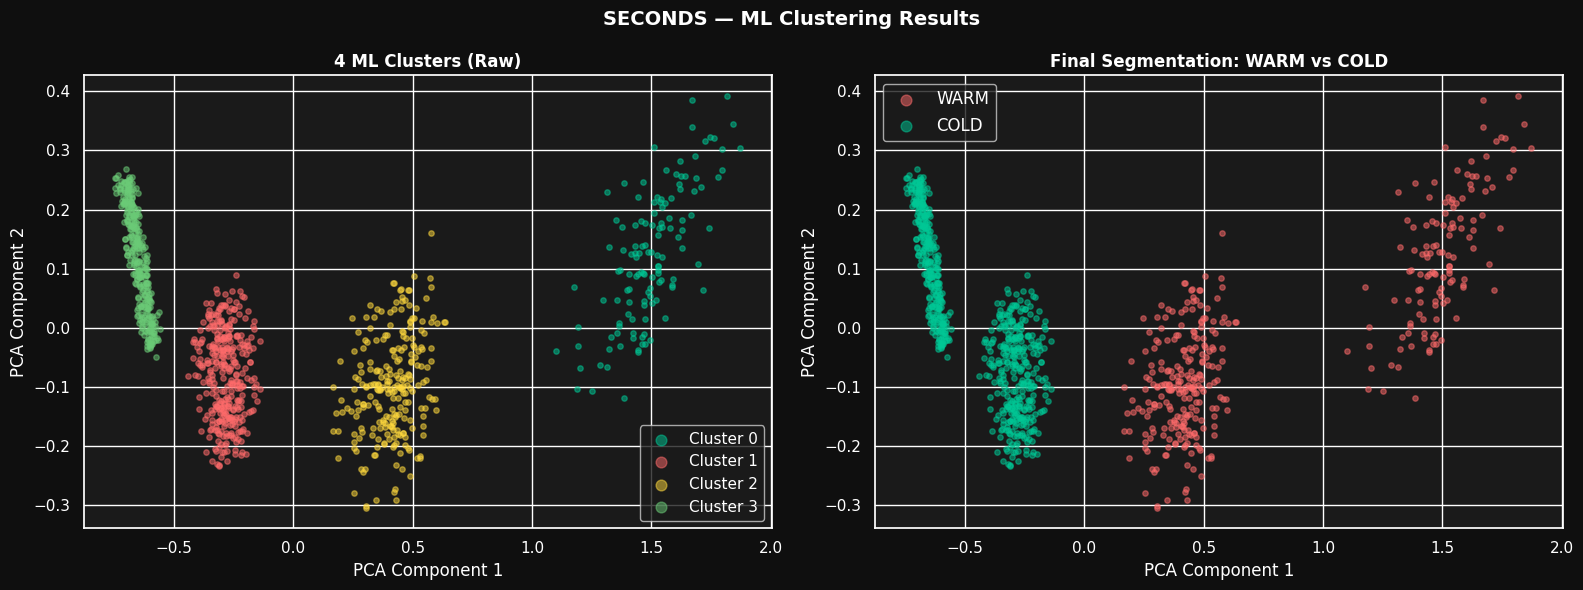


     SECONDS — ML SEGMENTATION COMPLETE
  🔥 WARM Users  : 369 (36.9%)
  ❄️  COLD Users  : 631 (63.1%)
  📊 Method Used : K-Means Clustering (K=4)
  🔢 Features    : 9 behavioral signals
  📉 Normalized  : MinMaxScaler (0 to 1)
  📐 Visualized  : PCA (9D → 2D)

✅ Block 4 Complete — Every user is now WARM or COLD!
   Ready to route newsletters in Block 5 🎯


In [54]:
# BLOCK 4 — USER SEGMENTATION with Machine Learning
# K-Means Clustering → Warm or Cold

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# ── STEP 1: Preparing the data for ML ─────────────────────────
# ML only understands numbers, so we feed it the 9 behavior columns

ml_features = [
    'Clicks_Last_30_Days',
    'Website_Visits_Last_30_Days',
    'Add_To_Cart_Last_30_Days',
    'Newsletter_Clicks_Last_30_Days',
    'Avg_Read_Time_Seconds',
    'Purchase_Last_90_Days',
    'Email_Open_Rate',
    'Subscription_Age_Months',
    'Unsubscribe_Risk_Score'
]

X = users_df[ml_features].copy()

# ── STEP 2: Normalizing the data ───────────────────────────────
# ML needs all numbers on the same scale (0 to 1)
# Otherwise "Avg_Read_Time_Seconds" (0-180) would overpower
# "Add_To_Cart" (0-20) unfairly

scaler    = MinMaxScaler()
X_scaled  = scaler.fit_transform(X)

print("✅ Step 1 & 2 Complete — Data normalized to 0-1 scale")
print(f"   Shape of ML input: {X_scaled.shape} (1000 users × 9 features)\n")


# ── STEP 3: Finding the optimal number of clusters (Elbow Method)
# We test K = 2 to 8 clusters and see where improvement stops

inertias = []
K_range  = range(2, 9)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

# Plotting the Elbow Curve
fig, ax = plt.subplots(figsize=(8, 4))
fig.patch.set_facecolor('#0f0f0f')
ax.set_facecolor('#1a1a1a')
ax.plot(K_range, inertias, 'o-', color='#00C896', linewidth=2.5,
        markersize=8, markerfacecolor='#FF6B6B')
ax.axvline(x=4, color='#FFD93D', linestyle='--', linewidth=1.5,
           label='Optimal K = 4')
ax.set_title('Elbow Method — Finding Optimal Clusters',
             color='white', fontweight='bold', fontsize=12)
ax.set_xlabel('Number of Clusters (K)', color='white')
ax.set_ylabel('Inertia (Lower = Better)', color='white')
ax.tick_params(colors='white')
ax.legend(facecolor='#1a1a1a', labelcolor='white')
plt.tight_layout()
plt.savefig('elbow_curve.png', dpi=150, bbox_inches='tight',
            facecolor='#0f0f0f')
plt.show()
print("📊 Elbow Curve rendered — K=4 is our optimal cluster count\n")


# ── STEP 4: Running K-Means with K=4 ────────────────────────────
kmeans       = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)
users_df['ML_Cluster'] = cluster_labels

print("✅ Step 4 Complete — K-Means clustering done!")
print(f"   Cluster distribution:")
print(users_df['ML_Cluster'].value_counts().sort_index().to_string())


# ── STEP 5: Identifying which clusters are WARM vs COLD ─────────
# We look at the average behavior of each cluster
# High behavior scores = WARM, Low = COLD

cluster_summary = users_df.groupby('ML_Cluster')[ml_features].mean()

# Calculating an overall engagement score per cluster
# (average of all positive signals, minus unsubscribe risk)
cluster_summary['Engagement_Score'] = (
    cluster_summary['Clicks_Last_30_Days']            / 80  +
    cluster_summary['Website_Visits_Last_30_Days']    / 60  +
    cluster_summary['Add_To_Cart_Last_30_Days']       / 20  +
    cluster_summary['Newsletter_Clicks_Last_30_Days'] / 30  +
    cluster_summary['Avg_Read_Time_Seconds']          / 180 +
    cluster_summary['Purchase_Last_90_Days']          / 6   +
    cluster_summary['Email_Open_Rate']                       -
    cluster_summary['Unsubscribe_Risk_Score']
) / 7

print(f"\n📊 Cluster Engagement Scores:")
print(cluster_summary['Engagement_Score'].round(3).to_string())

# Top 2 engagement scores = WARM, Bottom 2 = COLD
top2_clusters  = cluster_summary['Engagement_Score'].nlargest(2).index.tolist()
bot2_clusters  = cluster_summary['Engagement_Score'].nsmallest(2).index.tolist()

users_df['Segment'] = users_df['ML_Cluster'].apply(
    lambda c: 'WARM' if c in top2_clusters else 'COLD'
)

print(f"\n✅ Step 5 Complete — Segments assigned!")
print(f"   WARM clusters : {top2_clusters}")
print(f"   COLD clusters : {bot2_clusters}")


# ── STEP 6: Visualizing the clusters in 2D using PCA ───────────
# PCA squishes 9 dimensions down to 2 so we can plot it

pca       = PCA(n_components=2, random_state=42)
X_pca     = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.patch.set_facecolor('#0f0f0f')
fig.suptitle('SECONDS — ML Clustering Results',
             color='white', fontweight='bold', fontsize=14)

cluster_colors = ['#00C896', '#FF6B6B', '#FFD93D', '#6BCB77']
segment_colors = {'WARM': '#FF6B6B', 'COLD': '#00C896'}

# Left: 4 raw ML clusters
for cluster_id in range(4):
    mask = users_df['ML_Cluster'] == cluster_id
    axes[0].scatter(
        X_pca[mask, 0], X_pca[mask, 1],
        c=cluster_colors[cluster_id],
        label=f'Cluster {cluster_id}',
        alpha=0.5, s=15
    )
axes[0].set_facecolor('#1a1a1a')
axes[0].set_title('4 ML Clusters (Raw)',
                   color='white', fontweight='bold')
axes[0].set_xlabel('PCA Component 1', color='white')
axes[0].set_ylabel('PCA Component 2', color='white')
axes[0].tick_params(colors='white')
axes[0].legend(facecolor='#1a1a1a', labelcolor='white', markerscale=2)

# Right: Final WARM vs COLD
for segment, color in segment_colors.items():
    mask = users_df['Segment'] == segment
    axes[1].scatter(
        X_pca[mask, 0], X_pca[mask, 1],
        c=color, label=segment,
        alpha=0.5, s=15
    )
axes[1].set_facecolor('#1a1a1a')
axes[1].set_title('Final Segmentation: WARM vs COLD',
                   color='white', fontweight='bold')
axes[1].set_xlabel('PCA Component 1', color='white')
axes[1].set_ylabel('PCA Component 2', color='white')
axes[1].tick_params(colors='white')
axes[1].legend(facecolor='#1a1a1a', labelcolor='white',
               markerscale=2, fontsize=12)

plt.tight_layout()
plt.savefig('clustering_results.png', dpi=150,
            bbox_inches='tight', facecolor='#0f0f0f')
plt.show()


# ── FINAL SUMMARY ────────────────────────────────────────────
warm_count = (users_df['Segment'] == 'WARM').sum()
cold_count = (users_df['Segment'] == 'COLD').sum()

print("\n" + "="*55)
print("     SECONDS — ML SEGMENTATION COMPLETE")
print("="*55)
print(f"  🔥 WARM Users  : {warm_count} ({warm_count/10:.1f}%)")
print(f"  ❄️  COLD Users  : {cold_count} ({cold_count/10:.1f}%)")
print(f"  📊 Method Used : K-Means Clustering (K=4)")
print(f"  🔢 Features    : 9 behavioral signals")
print(f"  📉 Normalized  : MinMaxScaler (0 to 1)")
print(f"  📐 Visualized  : PCA (9D → 2D)")
print("="*55)
print("\n✅ Block 4 Complete — Every user is now WARM or COLD!")
print("   Ready to route newsletters in Block 5 🎯")

# BLOCK 5 — KEYWORD ROUTING RULES

This block loads the keyword categorisation logic that determines which
content each user type receives. Keywords are divided into three groups:
Cold-only keywords (acquisition and re-engagement offers like Flash Sale and
Sign Up Discount), Warm-only keywords (brand depth and product content like
New Arrivals and Watch Dials), and Common keywords (universal occasions like
Eid, Bengali New Year, and Black Friday that everyone receives). A smart
matching function handles typos, apostrophes, and naming variations between
the calendar and the keyword file to ensure nothing is misclassified.

In [55]:
# BLOCK 5 — LOAD KEYWORD ROUTING RULES

from google.colab import files
print("📂 Please upload your file: Keywords_Categorized.xlsx")
uploaded = files.upload()

keywords_df = pd.read_excel('Keywords_Categorized.xlsx')

# ── EXTRACTING THE THREE KEYWORD LISTS ──────────────────────────
cold_keywords   = keywords_df['Cold Users'].dropna().str.strip().tolist()
warm_keywords   = keywords_df['Warm Users'].dropna().str.strip().tolist()
common_keywords = keywords_df['Common'].dropna().str.strip().tolist()

# ── SALE DURATION KEYWORDS ───────────────────────────────────
# These tell us HOW LONG a sale runs
# Used in copy to accurately state the sale period
# e.g. "Bengali New Year, 3 Day Sale" → "our 3-day Bengali New Year sale"
sale_duration_map = {
    '7 day sale'      : '7 days',
    '3 day sale'      : '3 days',
    '1 week sale'     : '1 week',
    '1 week discount' : '1 week',
    '1 day sale'      : '1 day',
    '1 day discount'  : '1 day',
}

# ── MANUAL OVERRIDES ─────────────────────────────────────────
# Handles typos, apostrophes, singular/plural variants
# and any naming differences between calendar & keywords file

manual_overrides = {
    # COLD
    'exclusive discount'          : 'COLD',
    'exclusive discounts'         : 'COLD',
    'exlusive discounts'          : 'COLD',  # typo in calendar
    'referral'                    : 'COLD',

    # WARM
    'interational moon day'       : 'WARM',  # typo in calendar
    'international moon day'      : 'WARM',
    'new outlet at dhanmondi'     : 'WARM',
    'new acquisition'             : 'WARM',
    'updated terms & conditions'  : 'WARM',
    'diver watch'                 : 'WARM',  # singular in calendar
    'dress watch'                 : 'WARM',  # singular in calendar

    # COMMON
    'eid ul azha'                 : 'COMMON',
    'eid wish'                    : 'COMMON',
    'eid'                         : 'COMMON',
    "fathers' day"                : 'COMMON',
    "father's day"                : 'COMMON',
    'halloween'                   : 'COMMON',
    'july revolution'             : 'COMMON',
    'victory day'                 : 'COMMON',
    'easter sunday wish'          : 'COMMON',
    'winter end sale'             : 'COMMON',
    'spring collection'           : 'COMMON',
    '21% off'                     : 'COMMON',
}

# ── EXPAND MULTI-VARIANT KEYWORDS ────────────────────────────
# e.g. "Exclusive Discount / Exclusive Discounts / Exlusive Discount"
# becomes three separate entries for reliable matching

def expand_variants(keyword_list):
    expanded = []
    for kw in keyword_list:
        if '/' in kw:
            parts = [p.strip() for p in kw.split('/')]
            expanded.extend(parts)
        else:
            expanded.append(kw.strip())
    return expanded

cold_keywords_expanded   = expand_variants(cold_keywords)
warm_keywords_expanded   = expand_variants(warm_keywords)
common_keywords_expanded = expand_variants(common_keywords)

# Lowercase for matching
cold_kw_clean   = [k.lower() for k in cold_keywords_expanded]
warm_kw_clean   = [k.lower() for k in warm_keywords_expanded]
common_kw_clean = [k.lower() for k in common_keywords_expanded]

# ── SMART CLASSIFIER FUNCTION ────────────────────────────────
def classify_keyword(keyword):
    """
    Classifies a calendar keyword into:
    COLD, WARM, COMMON, DURATION, or UNKNOWN
    Priority order:
    1. Sale duration check
    2. Manual overrides (typos & variants)
    3. Common keywords
    4. Warm keywords
    5. Cold keywords
    6. UNKNOWN
    """
    kw = keyword.lower().strip()

    # 1. Sale duration first
    for dk in sale_duration_map.keys():
        if dk in kw or kw in dk:
            return 'DURATION'

    # 2. Manual overrides
    if kw in manual_overrides:
        return manual_overrides[kw]

    # 3. Common
    for ck in common_kw_clean:
        if ck in kw or kw in ck:
            return 'COMMON'

    # 4. Warm
    for wk in warm_kw_clean:
        if wk in kw or kw in wk:
            return 'WARM'

    # 5. Cold
    for ck in cold_kw_clean:
        if ck in kw or kw in ck:
            return 'COLD'

    return 'UNKNOWN'

# ── DURATION EXTRACTOR ───────────────────────────────────────
def extract_sale_duration(keywords_list):
    """
    From a Friday's keyword list, finds the sale duration.
    Returns human-readable string like '3 days', '1 week', or None.
    Block 8 uses this to write accurate sale period in copy.
    e.g. "our 3-day Bengali New Year sale"
    """
    for kw in keywords_list:
        kw_lower = kw.lower().strip()
        for duration_kw, duration_label in sale_duration_map.items():
            if duration_kw in kw_lower:
                return duration_label
    return None

# ── TEST ON ALL CALENDAR KEYWORDS ────────────────────────────
all_calendar_keywords = set()
for kw_list in fridays_df['Keywords']:
    for kw in kw_list:
        all_calendar_keywords.add(kw.strip())

classification_results = []
for kw in sorted(all_calendar_keywords):
    label = classify_keyword(kw)
    classification_results.append({
        'Keyword'   : kw,
        'Routed_To' : label
    })

classification_df = pd.DataFrame(classification_results)

# ── DISPLAY ──────────────────────────────────────────────────
print("\n Block 5 Complete — Keyword Routing Rules Loaded!")
print(f"\n Keyword Lists:")
print(f"     Cold-only keywords  : {len(cold_keywords_expanded)}")
print(f"    Warm-only keywords  : {len(warm_keywords_expanded)}")
print(f"    Common keywords     : {len(common_keywords_expanded)}")
print(f"   ⏱  Duration keywords   : {len(sale_duration_map)}")

print(f"\n🔍 Full Classification of All Calendar Keywords:")
print(f"{'Keyword':<45} {'Routed To'}")
print("-" * 62)
for _, row in classification_df.iterrows():
    emoji = {
        'WARM'    : '🔥',
        'COLD'    : '❄️ ',
        'COMMON'  : '🤝',
        'DURATION': '⏱️ ',
        'UNKNOWN' : '❓'
    }.get(row['Routed_To'], '❓')
    print(f"  {row['Keyword']:<43} {emoji} {row['Routed_To']}")

print(f"\n📊 Routing Breakdown:")
print(classification_df['Routed_To'].value_counts().to_string())

# Flag any remaining unknowns
unknowns = classification_df[classification_df['Routed_To'] == 'UNKNOWN']
if len(unknowns) > 0:
    print(f"\n⚠️  {len(unknowns)} unclassified keyword(s) still remaining:")
    for _, row in unknowns.iterrows():
        print(f"   → '{row['Keyword']}'")
else:
    print(f"\n✅ Zero UNKNOWNs — every calendar keyword is classified!")

# ── DEMO: Duration detection on sample Fridays ───────────────
print(f"\n⏱️  Sale Duration Detection — Sample Check:")
print("-" * 62)
for _, row in fridays_df.head(10).iterrows():
    duration     = extract_sale_duration(row['Keywords'])
    duration_str = duration if duration else "No sale this week"
    print(f"  {str(row['Date'])} | {duration_str:<18} | {', '.join(row['Keywords'])}")

📂 Please upload your file: Keywords_Categorized.xlsx


Saving Keywords_Categorized.xlsx to Keywords_Categorized (3).xlsx

 Block 5 Complete — Keyword Routing Rules Loaded!

 Keyword Lists:
     Cold-only keywords  : 8
    Warm-only keywords  : 18
    Common keywords     : 33
   ⏱  Duration keywords   : 6

🔍 Full Classification of All Calendar Keywords:
Keyword                                       Routed To
--------------------------------------------------------------
  1 Day Discount                              ⏱️  DURATION
  1 Day Sale                                  ⏱️  DURATION
  1 Week Discount                             ⏱️  DURATION
  1 Week Sale                                 ⏱️  DURATION
  11.11 Sale                                  🤝 COMMON
  21% Off                                     🤝 COMMON
  3 Day Sale                                  ⏱️  DURATION
  7 Day Sale                                  ⏱️  DURATION
  About Company                               🔥 WARM
  Bengali New Year                            🤝 COMMON
  Black F

# BLOCK 6 — FRIDAY DETECTION & KEYWORD EXTRACTION

This block is the automation trigger. It automatically detects the current
Friday, looks it up in the Seconds calendar, and extracts all keywords for
that week. It then routes each keyword to the correct audience — warm users,
cold users, or both — using the rules defined in Block 5. A full year preview
table shows all 52 Fridays with their warm and cold content lists, proving
the system works automatically for every week of the year without manual
input.

In [56]:
# BLOCK 6 — FRIDAY DETECTION & KEYWORD EXTRACTION
# The system finds today's Friday and routes keywords


# ── STEP 1: DETECTING TODAY'S FRIDAY ────────────────────────────
# For the real system this runs automatically every Friday
# For demo purposes we can simulate ANY Friday in the calendar

def get_current_friday():
    """Returns today's date if it's Friday, otherwise the most recent Friday"""
    today = datetime.date.today()
    # 4 = Friday in Python's weekday system (Monday=0)
    days_since_friday = (today.weekday() - 4) % 7
    return today - datetime.timedelta(days=days_since_friday)

def get_friday_data(target_date):
    """
    Looks up a specific Friday in the calendar.
    Returns all keywords and their classifications for that date.
    """
    # Find matching row in calendar
    match = fridays_df[fridays_df['Date'] == target_date]

    if match.empty:
        return None

    row          = match.iloc[0]
    keywords     = row['Keywords']
    sale_duration = extract_sale_duration(keywords)

    # Classify every keyword for this Friday
    warm_kws     = []
    cold_kws     = []
    common_kws   = []
    duration_kws = []

    for kw in keywords:
        label = classify_keyword(kw)
        if label == 'WARM'    : warm_kws.append(kw)
        elif label == 'COLD'  : cold_kws.append(kw)
        elif label == 'COMMON': common_kws.append(kw)
        elif label == 'DURATION': duration_kws.append(kw)

    return {
        'date'          : target_date,
        'all_keywords'  : keywords,
        'warm_keywords' : warm_kws,
        'cold_keywords' : cold_kws,
        'common_keywords': common_kws,
        'duration_keywords': duration_kws,
        'sale_duration' : sale_duration,
        # What each user type actually sees:
        'warm_content'  : warm_kws + common_kws,
        'cold_content'  : cold_kws + common_kws,
    }

# ── STEP 2: RUNNING FOR TODAY / SIMULATE ─────────────────────────
# For demo purposes we force a specific rich Friday
# so we can clearly show warm vs cold split
# In production this would use get_current_friday() automatically

demo_date   = datetime.date(2026, 3, 13)
friday_info = get_friday_data(demo_date)
print(f"ℹ️  Demo mode: Simulating Friday {demo_date}")
print(f"   (In production this auto-detects every Friday)\n")

# ── STEP 3: DISPLAYING THE ROUTING RESULTS ──────────────────────
fi = friday_info

print("=" * 62)
print(f"   📅 FRIDAY DETECTED: {fi['date'].strftime('%B %d, %Y')}")
print("=" * 62)

print(f"\n📋 All Keywords This Week ({len(fi['all_keywords'])} total):")
for kw in fi['all_keywords']:
    label = classify_keyword(kw)
    emoji = {
        'WARM'    : '🔥',
        'COLD'    : '❄️ ',
        'COMMON'  : '🤝',
        'DURATION': '⏱️ ',
    }.get(label, '❓')
    print(f"   {emoji} {kw}")

if fi['sale_duration']:
    print(f"\n⏱️  Sale Duration This Week: {fi['sale_duration']}")

print(f"\n🔥 WARM USER content this week ({len(fi['warm_content'])} items):")
for kw in fi['warm_content']:
    print(f"   → {kw}")

print(f"\n❄️  COLD USER content this week ({len(fi['cold_content'])} items):")
for kw in fi['cold_content']:
    print(f"   → {kw}")

# ── STEP 4: SHOWING ALL 52 FRIDAYS ROUTED ───────────────────────
print(f"\n\n📆 FULL YEAR ROUTING PREVIEW — All 52 Fridays:")
print("-" * 80)
print(f"  {'Date':<14} {'Warm Items':<12} {'Cold Items':<12} {'Duration':<12} {'Keywords'}")
print("-" * 80)

for _, row in fridays_df.iterrows():
    info = get_friday_data(row['Date'])
    if info:
        duration_str = info['sale_duration'] if info['sale_duration'] else "—"
        kw_preview   = ', '.join(info['all_keywords'])[:45]
        print(f"  {str(info['date']):<14} "
              f"{len(info['warm_content']):<12} "
              f"{len(info['cold_content']):<12} "
              f"{duration_str:<12} "
              f"{kw_preview}")

print(f"\n✅ Block 6 Complete — Friday detection & keyword routing working!")
print(f"   The system can now identify ANY Friday and route its keywords.")
print(f"   Ready for TF-IDF ranking in Block 7 🎯")

ℹ️  Demo mode: Simulating Friday 2026-03-13
   (In production this auto-detects every Friday)

   📅 FRIDAY DETECTED: March 13, 2026

📋 All Keywords This Week (6 total):
   🔥 New arrivals
   🔥 New Brand Acquisition
   🤝 Ramadan
   🤝 Eid
   ⏱️  1 Week Sale
   ❄️  Sign Up Discount

⏱️  Sale Duration This Week: 1 week

🔥 WARM USER content this week (4 items):
   → New arrivals
   → New Brand Acquisition
   → Ramadan
   → Eid

❄️  COLD USER content this week (3 items):
   → Sign Up Discount
   → Ramadan
   → Eid


📆 FULL YEAR ROUTING PREVIEW — All 52 Fridays:
--------------------------------------------------------------------------------
  Date           Warm Items   Cold Items   Duration     Keywords
--------------------------------------------------------------------------------
  2026-01-02     2            1            1 week       New Year, 1 Week Sale, New Arrivals
  2026-01-09     2            2            —            New Year, Sign Up Discount, New Arrivals
  2026-01-16     0     

# BLOCK 7 — TF-IDF KEYWORD RANKING (NLP)

This block applies TF-IDF — Term Frequency-Inverse Document Frequency — a
Natural Language Processing technique that ranks keywords by their importance.
The TF-IDF model is trained on all 52 Fridays as a document corpus, learning
which keywords appear rarely across the year versus which appear routinely.
Keywords that are rare and special this week score higher and are placed first
in the newsletter. Keywords that appear almost every week score lower and are
placed later. This ensures the most unique and relevant content always leads.

In [57]:
# BLOCK 7 — TF-IDF KEYWORD RANKING (THE NLP PART)
# Ranks keywords by importance so the most relevant
# content appears first in the newsletter

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# TF-IDF asks: "How important is this keyword compared to all others?"
# Keywords that are RARE across the year but appear THIS week (such as Eid or Valentine's Day)
# get a HIGH score = they are special and should be highlighted
# Keywords that appear EVERY week (like Sign Up Discount)
# get a LOWER score = they are routine, less special

# ── STEP 1: BUILD THE CORPUS ──────────────────────────────────
# A corpus is all 52 Fridays' keywords joined as sentences
# TF-IDF learns what's common vs rare by reading all of them

corpus = []
for _, row in fridays_df.iterrows():
    # Join all keywords into one string per Friday
    sentence = ' '.join([kw.lower().replace(' ', '_') for kw in row['Keywords']])
    corpus.append(sentence)

# ── STEP 2: FIT TF-IDF ON THE FULL YEAR ─────────────────────
vectorizer = TfidfVectorizer(
    analyzer    = 'word',
    token_pattern = r"[a-z][a-z0-9_'&%]*",  # handles our keyword format
    ngram_range = (1, 3),   # single words AND phrases
    min_df      = 1,        # include even rare keywords
    max_df      = 0.85,     # ignore keywords appearing in 85%+ of weeks
)

tfidf_matrix = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()

print("✅ TF-IDF model trained on all 52 Fridays!")
print(f"   Total unique keyword tokens learned: {len(feature_names)}\n")

# ── STEP 3: RANKING FUNCTION ──────────────────────────────────
def rank_keywords_tfidf(friday_keywords, friday_index):
    """
    Takes a Friday's keywords and ranks them by TF-IDF score.
    Higher score = more unique/important this week = appears first.

    friday_keywords : list of keyword strings for that Friday
    friday_index    : position of this Friday in the calendar (0-51)
    """
    # Get TF-IDF scores for this Friday
    friday_vector = tfidf_matrix[friday_index].toarray()[0]

    scored_keywords = []
    for kw in friday_keywords:
        # Convert keyword to the same format as corpus
        kw_token = kw.lower().replace(' ', '_')

        # Find best matching score in TF-IDF vocabulary
        best_score = 0
        for token in kw_token.split('_'):
            if token in feature_names:
                idx   = list(feature_names).index(token)
                score = friday_vector[idx]
                if score > best_score:
                    best_score = score

        scored_keywords.append({
            'keyword'   : kw,
            'tfidf_score': round(best_score, 4),
            'category'  : classify_keyword(kw)
        })

    # Sort by score — highest first
    scored_keywords.sort(key=lambda x: x['tfidf_score'], reverse=True)
    return scored_keywords

# ── STEP 4: APPLY RANKING TO THE DEMO FRIDAY ─────────────────
# Find the index of our demo Friday in the calendar
demo_date  = friday_info['date']
demo_index = fridays_df[fridays_df['Date'] == demo_date].index[0]

# Rank warm and cold content separately
warm_ranked = rank_keywords_tfidf(friday_info['warm_content'], demo_index)
cold_ranked = rank_keywords_tfidf(friday_info['cold_content'], demo_index)

# ── STEP 5: DISPLAY RANKINGS ──────────────────────────────────
print(f"📅 TF-IDF Rankings for: {demo_date.strftime('%B %d, %Y')}")
print("=" * 62)

print(f"\n🔥 WARM USER Keywords — Ranked by Importance:")
print(f"  {'Rank':<6} {'Keyword':<35} {'TF-IDF Score':<14} {'Category'}")
print("-" * 70)
for i, item in enumerate(warm_ranked, 1):
    emoji = {'WARM':'🔥','COLD':'❄️ ','COMMON':'🤝'}.get(item['category'],'')
    print(f"  {i:<6} {item['keyword']:<35} {item['tfidf_score']:<14} {emoji} {item['category']}")

print(f"\n❄️  COLD USER Keywords — Ranked by Importance:")
print(f"  {'Rank':<6} {'Keyword':<35} {'TF-IDF Score':<14} {'Category'}")
print("-" * 70)
for i, item in enumerate(cold_ranked, 1):
    emoji = {'WARM':'🔥','COLD':'❄️ ','COMMON':'🤝'}.get(item['category'],'')
    print(f"  {i:<6} {item['keyword']:<35} {item['tfidf_score']:<14} {emoji} {item['category']}")

# ── STEP 6: SHOW WHAT THIS MEANS FOR THE NEWSLETTER ──────────
print(f"\n💡 What TF-IDF decided for this week:")
print("-" * 62)
if warm_ranked:
    top_warm = warm_ranked[0]['keyword']
    print(f"   🔥 Warm newsletter LEADS with  : '{top_warm}'")
if cold_ranked:
    top_cold = cold_ranked[0]['keyword']
    print(f"   ❄️  Cold newsletter LEADS with  : '{top_cold}'")
if friday_info['sale_duration']:
    print(f"   ⏱️  Sale duration to mention    : {friday_info['sale_duration']}")

# ── STEP 7: STORE RANKED RESULTS FOR BLOCK 8 ─────────────────
# Block 8 (copywriting engine) will use these ranked lists
# to decide content order and emphasis

friday_info['warm_ranked'] = warm_ranked
friday_info['cold_ranked'] = cold_ranked

print(f"\n Block 7 Complete — TF-IDF ranking done!")
print(f"   Keywords are now ordered by importance for the newsletter.")
print(f"   The copywriting engine in Block 8 will follow this order. ")

✅ TF-IDF model trained on all 52 Fridays!
   Total unique keyword tokens learned: 193

📅 TF-IDF Rankings for: March 13, 2026

🔥 WARM USER Keywords — Ranked by Importance:
  Rank   Keyword                             TF-IDF Score   Category
----------------------------------------------------------------------
  1      Eid                                 0.2869         🤝 COMMON
  2      Ramadan                             0.2597         🤝 COMMON
  3      New arrivals                        0              🔥 WARM
  4      New Brand Acquisition               0              🔥 WARM

❄️  COLD USER Keywords — Ranked by Importance:
  Rank   Keyword                             TF-IDF Score   Category
----------------------------------------------------------------------
  1      Eid                                 0.2869         🤝 COMMON
  2      Ramadan                             0.2597         🤝 COMMON
  3      Sign Up Discount                    0              ❄️  COLD

💡 What TF-IDF decided

# BLOCK 7B — RELEVANCE BOOST

TF-IDF ranks keywords by rarity but does not account for audience relevance.
This block adds a relevance boost of +0.15 to any keyword that exclusively
belongs to that user segment. For example, New Arrivals is a warm-only
keyword — it gets boosted in the warm newsletter ranking so it is never
buried below common keywords. Similarly, Sign Up Discount gets boosted in
the cold newsletter. This ensures segment-specific content is always
appropriately prioritised alongside occasion-based content.

In [58]:
# ============================================================
# BLOCK 7B — RELEVANCE BOOST FOR SEGMENT-SPECIFIC KEYWORDS
# Keywords exclusive to WARM or COLD users get a priority bump
# so they never get buried behind common keywords
# ============================================================

def rank_keywords_boosted(friday_keywords_scored, segment):
    """
    Takes already-scored keywords from TF-IDF and applies
    a relevance boost to segment-specific keywords.

    Boost logic:
    - COMMON keywords → no change (TF-IDF score stands)
    - Segment-specific keywords (WARM for warm, COLD for cold)
      → get a +0.15 boost so they don't get buried at the bottom
    - Other segment's keywords → not present (already filtered out)

    segment: 'WARM' or 'COLD'
    """
    boosted = []
    for item in friday_keywords_scored:
        score    = item['tfidf_score']
        category = item['category']

        # Applying boost to segment-specific keywords
        if category == segment:
            score = round(score + 0.15, 4)
            boosted_flag = '⬆️  boosted'
        else:
            boosted_flag = ''

        boosted.append({
            'keyword'     : item['keyword'],
            'tfidf_score' : score,
            'category'    : category,
            'boost_note'  : boosted_flag
        })

    # Re-sort after boost
    boosted.sort(key=lambda x: x['tfidf_score'], reverse=True)
    return boosted

# ── APPLY BOOST TO DEMO FRIDAY ────────────────────────────────
warm_ranked_boosted = rank_keywords_boosted(warm_ranked, 'WARM')
cold_ranked_boosted = rank_keywords_boosted(cold_ranked, 'COLD')

# ── DISPLAY ──────────────────────────────────────────────────
print(f"📅 Boosted Rankings for: {friday_info['date'].strftime('%B %d, %Y')}")
print("=" * 72)

print(f"\n🔥 WARM USER Keywords — After Relevance Boost:")
print(f"  {'Rank':<6} {'Keyword':<35} {'Final Score':<14} {'Category':<10} {'Note'}")
print("-" * 78)
for i, item in enumerate(warm_ranked_boosted, 1):
    emoji = {'WARM':'🔥','COLD':'❄️ ','COMMON':'🤝'}.get(item['category'],'')
    print(f"  {i:<6} {item['keyword']:<35} {item['tfidf_score']:<14} "
          f"{emoji} {item['category']:<10} {item['boost_note']}")

print(f"\n❄️  COLD USER Keywords — After Relevance Boost:")
print(f"  {'Rank':<6} {'Keyword':<35} {'Final Score':<14} {'Category':<10} {'Note'}")
print("-" * 78)
for i, item in enumerate(cold_ranked_boosted, 1):
    emoji = {'WARM':'🔥','COLD':'❄️ ','COMMON':'🤝'}.get(item['category'],'')
    print(f"  {i:<6} {item['keyword']:<35} {item['tfidf_score']:<14} "
          f"{emoji} {item['category']:<10} {item['boost_note']}")

print(f"\n💡 Final newsletter order decided:")
print("-" * 55)
if warm_ranked_boosted:
    print(f"   🔥 Warm newsletter LEADS with : '{warm_ranked_boosted[0]['keyword']}'")
if cold_ranked_boosted:
    print(f"   ❄️  Cold newsletter LEADS with : '{cold_ranked_boosted[0]['keyword']}'")

# ── SAVE FOR BLOCK 8 ─────────────────────────────────────────
friday_info['warm_final'] = warm_ranked_boosted
friday_info['cold_final'] = cold_ranked_boosted

print(f"\n✅ Block 7B Complete — Relevance boost applied!")
print(f"   Segment-specific keywords now correctly prioritized.")
print(f"   Final ranked lists saved and ready for Block 8 🎯")

📅 Boosted Rankings for: March 13, 2026

🔥 WARM USER Keywords — After Relevance Boost:
  Rank   Keyword                             Final Score    Category   Note
------------------------------------------------------------------------------
  1      Eid                                 0.2869         🤝 COMMON     
  2      Ramadan                             0.2597         🤝 COMMON     
  3      New arrivals                        0.15           🔥 WARM       ⬆️  boosted
  4      New Brand Acquisition               0.15           🔥 WARM       ⬆️  boosted

❄️  COLD USER Keywords — After Relevance Boost:
  Rank   Keyword                             Final Score    Category   Note
------------------------------------------------------------------------------
  1      Eid                                 0.2869         🤝 COMMON     
  2      Ramadan                             0.2597         🤝 COMMON     
  3      Sign Up Discount                    0.15           ❄️  COLD       ⬆️  boosted

💡

# BLOCK 8 PART 1 — CONTENT TEMPLATES

This block defines the copywriting templates for every keyword in the
Seconds calendar. Each keyword has two versions of copy — one written for
warm users in a rich, relationship-focused tone, and one written for cold
users in a short, punchy, offer-driven tone. Templates cover all occasion
keywords, product keywords, company news keywords, and promotional keywords.
Empty templates are intentionally left blank where a keyword does not apply
to a segment — for example, Flash Sale copy is empty in the warm version
because flash sales are a cold-user strategy only.

In [59]:
# ============================================================
# BLOCK 8 — COPYWRITING ENGINE
# Reads the ranked keywords and writes the actual newsletter
# ============================================================

# ── CONTENT TEMPLATES ────────────────────────────────────────
# Each keyword has a warm version and a cold version of its copy
# Block 7B's ranking decides the ORDER they appear in

content_templates = {

    # ── OCCASIONS (COMMON — both users get these) ─────────────

    'eid': {
        'warm': """Eid Mubarak from all of us at Seconds! 🌙
This blessed occasion is a time for joy, gratitude, and the people who matter most.
We at Seconds are honoured to be part of your celebrations — because every precious
moment deserves to be marked with something equally timeless.""",
        'cold': """Eid Mubarak! 🌙
Seconds wishes you and your loved ones a joyful celebration.
We have something special waiting for you this Eid — read on."""
    },

    'eid wish': {
        'warm': """Eid Mubarak from all of us at Seconds! 🌙
This blessed occasion is a time for joy, gratitude, and the people who matter most.
We at Seconds are honoured to be part of your celebrations — because every precious
moment deserves to be marked with something equally timeless.""",
        'cold': """Eid Mubarak! 🌙
Seconds wishes you and your loved ones a joyful celebration.
We have something special waiting for you this Eid — read on."""
    },

    'eid ul azha': {
        'warm': """Eid ul Azha Mubarak from Seconds! 🐑
A time of sacrifice, gratitude, and togetherness. May this occasion bring
you and your family immense blessings. We celebrate this special day with you.""",
        'cold': """Eid ul Azha Mubarak! 🐑
Seconds is celebrating with you — and we have an exclusive offer
just for this occasion. Don't miss it."""
    },

    'ramadan': {
        'warm': """
As this sacred month of reflection and gratitude unfolded, Seconds stood
with you. We curated something truly special to mark this season —
because the most meaningful moments deserve to be remembered.""",
        'cold': """The gates are open for those seeking a fresh start.
Let the prayers of the night wash away the dust of the year.
From the first crescent to the final prayer, everything changes.
Check what we have prepared exclusively for you."""
    },

    'ramadan wish': {
        'warm': """Ramadan Mubarak from the Seconds family! 🌙
May this month of reflection bring you peace, purpose, and joy.
We are grateful for your continued trust in us.""",
        'cold': """Ramadan Mubarak! 🌙
Seconds has special Ramadan offers ready for you. Keep reading."""
    },

    'bengali new year': {
        'warm': """Shubho Noboborsho! 🎊
A brand new Bengali year — full of promise, colour, and new beginnings.
At Seconds, we celebrate this milestone with our valued community.
Here is to another year of marking life's most meaningful moments together.""",
        'cold': """Shubho Noboborsho! 🎊
New year, new beginnings — and a special Seconds offer to start it right.
Read on to discover what we have for you."""
    },

    'new year': {
        'warm': """Happy New Year from Seconds! 🥂
As we step into a fresh chapter, we are grateful for every moment
you have shared with us. Here is to a year full of meaningful milestones.""",
        'cold': """Happy New Year from Seconds! 🥂
Start the year with something special.
We have an exclusive offer just for you — read on."""
    },

    "valentine's day": {
        'warm': """Valentine's Day is almost here 💝
At Seconds, we believe that love deserves to be marked with something
as enduring as the feeling itself. A timepiece is not just a gift —
it is a reminder that ticks with every heartbeat.""",
        'cold': """Valentine's Day is coming 💝
Give a gift that lasts forever. Seconds has the perfect timepiece
for your special someone — at a special price, just for you."""
    },

    "mother's day": {
        'warm': """Happy Mother's Day 💐
To the women who gave us our first sense of time — of morning routines,
school runs, and bedtime stories. Seconds honours every mother this week
with something as graceful and enduring as she is.""",
        'cold': """Mother's Day is this week 💐
Give Mum a gift she will treasure forever.
Seconds has a special one-day offer — do not miss it."""
    },

    "fathers' day": {
        'warm': """Happy Father's Day 👔
To the men who taught us patience, discipline, and the value of time.
Seconds celebrates every father this week with a timepiece worthy
of his legacy.""",
        'cold': """Father's Day is here 👔
The perfect gift for Dad — a Seconds timepiece at a special price.
Today only. Do not miss it."""
    },

    'friendship day': {
        'warm': """Happy Friendship Day! 🤝
To the friends who make every moment worth remembering —
Seconds celebrates the bonds that stand the test of time.""",
        'cold': """Happy Friendship Day! 🤝
Celebrate with someone special — and a special Seconds offer.
Read on."""
    },

    'christmas': {
        'warm': """Merry Christmas from Seconds! 🎄
The season of warmth, giving, and togetherness is here.
We have curated something truly special to make your festive
season even more memorable.""",
        'cold': """Merry Christmas! 🎄
Seconds has a festive treat just for you.
A limited-time Christmas offer — read on."""
    },

    'diwali': {
        'warm': """Happy Diwali from Seconds! 🪔
The festival of lights is a celebration of triumph, joy, and new beginnings.
We honour this beautiful occasion with something as radiant as the season itself.""",
        'cold': """Happy Diwali! 🪔
Seconds is celebrating the festival of lights with a special offer for you.
Read on to discover it."""
    },

    'durga puja': {
        'warm': """Shubho Bijoya from Seconds! 🙏
As the festivities of Durga Puja fill the air with joy and celebration,
we send our warmest wishes to you and your family.""",
        'cold': """Shubho Bijoya! 🙏
Seconds celebrates Durga Puja with a special offer just for you."""
    },

    'halloween': {
        'warm': """Happy Halloween from Seconds! 🎃
Things may go bump in the night — but a Seconds timepiece
always keeps perfect time. Even in the dark.""",
        'cold': """Happy Halloween! 🎃
A spooky good deal from Seconds — just for you.
Read on before it vanishes at midnight."""
    },

    'july revolution': {
        'warm': """On this historic day, Seconds stands in solidarity
with the spirit of Bangladesh — resilient, bold, and forward-moving.
We honour the courage that shapes our nation's story.""",
        'cold': """Seconds honours the July Revolution today.
A special offer in the spirit of new beginnings — read on."""
    },

    'victory day': {
        'warm': """Happy Victory Day! 🇧🇩
On this proud day for Bangladesh, Seconds honours the courage,
sacrifice, and resilience that built our nation.
We are proud to be a Bangladeshi brand serving Bangladeshi stories.""",
        'cold': """Happy Victory Day! 🇧🇩
Seconds celebrates with Bangladesh — and with you.
A special offer in honour of this historic day."""
    },

    'international mother language day': {
        'warm': """On this International Mother Language Day,
Seconds celebrates the beauty of Bengali — our language,
our identity, our pride. আমাদের ভাষা, আমাদের গর্ব।""",
        'cold': """Happy Mother Language Day!
Seconds celebrates our language and culture —
with a 21% off special, just for today."""
    },

    '21% off': {
        'warm': """As a token of celebration this Mother Language Day,
enjoy 21% off across our collection — a tribute to the 21st of February.""",
        'cold': """21% OFF today only!
In honour of Mother Language Day, Seconds is offering
21% off sitewide. Use your discount before midnight."""
    },

    'may day': {
        'warm': """Happy May Day from Seconds! ✊
We honour the dignity of work and the people who build
our world every single day. Today we celebrate you.""",
        'cold': """Happy May Day! ✊
Seconds is celebrating workers everywhere — with a special
1-day discount just for today."""
    },

    'easter sunday wish': {
        'warm': """Happy Easter from Seconds! 🐣
A season of renewal and new beginnings. We celebrate this joyful
occasion with our valued community.""",
        'cold': """Happy Easter! 🐣
Seconds has a springtime surprise for you — read on."""
    },

    'spring': {
        'warm': """Spring has arrived — and with it, a fresh new collection at Seconds. 🌸
The season of renewal calls for a timepiece that captures its energy.
Discover our Spring Collection, curated for those who embrace new beginnings.""",
        'cold': """Spring is here! 🌸
New season, new deals at Seconds.
Discover what we have lined up for you this spring."""
    },

    'winter end sale': {
        'warm': """Our Winter End Sale is here — and it is worth the wait. ❄️
As the season wraps up, we are offering our most loved winter
timepieces at exceptional prices. A final farewell to the cold,
in the most stylish way possible.""",
        'cold': """Winter End Sale at Seconds! ❄️
Last chance to grab winter favourites at reduced prices.
Limited stock — act fast."""
    },

    'black friday': {
        'warm': """Black Friday at Seconds is here. 🖤
Our biggest sale of the year — curated exclusively for our most
valued customers. Early access, best prices, and pieces
you have had your eye on all year.""",
        'cold': """Black Friday is HERE. 🖤
Seconds' biggest sale of the year — massive discounts,
limited time. Do not wait."""
    },

    '11.11 sale': {
        'warm': """11.11 — and Seconds is celebrating with our community. 🎉
Our annual sale event brings together our finest pieces at
extraordinary prices. Because you deserve the extraordinary.""",
        'cold': """11.11 SALE is LIVE at Seconds! 🎉
Huge discounts, today only.
Jump in before it is over."""
    },

    # ── COLD USER KEYWORDS ────────────────────────────────────

    'flash sale': {
        'warm': """""",  # Flash sale is cold only — won't appear in warm
        'cold': """⚡ FLASH SALE — Live Now at Seconds!
This is not a drill. Our Flash Sale is live and prices
will not stay this low for long.
Grab your favourite timepiece before it is gone."""
    },

    'mega flash sale': {
        'warm': """""",
        'cold': """⚡ MEGA FLASH SALE — Seconds' Biggest Ever!
Drop everything. Our Mega Flash Sale is live right now —
the deepest discounts we have ever offered.
This is the one you have been waiting for."""
    },

    'sign up discount': {
        'warm': """""",
        'cold': """🎁 Not yet a Seconds member?
Sign up today and unlock an exclusive 15% discount
on your first purchase. Joining the Seconds family
has never been more rewarding."""
    },

    'newsletter subscription discount': {
        'warm': """""",
        'cold': """📧 Stay in the loop — and get rewarded for it.
Subscribe to the Seconds newsletter and receive an
exclusive discount on your next purchase.
Great deals, delivered straight to your inbox every Friday."""
    },

    'exclusive discount': {
        'warm': """""",
        'cold': """💎 An Exclusive Discount — Just for You.
Seconds is offering a special discount this week.
This offer is personalised and time-sensitive —
make the most of it before it expires."""
    },

    'exclusive discounts': {
        'warm': """""",
        'cold': """💎 Exclusive Discounts — Unlocked for You.
This week, Seconds is rewarding our subscribers with
exclusive discounts across selected timepieces.
Your next favourite watch just got more affordable."""
    },

    'exlusive discounts': {
        'warm': """""",
        'cold': """💎 Exclusive Discounts — Unlocked for You.
This week, Seconds is rewarding our subscribers with
exclusive discounts across selected timepieces.
Your next favourite watch just got more affordable."""
    },

    'referral': {
        'warm': """""",
        'cold': """👥 Know someone who loves great watches?
Refer a friend to Seconds and earn rewards for every
successful referral. Share the love — and the savings."""
    },

    # ── WARM USER KEYWORDS ────────────────────────────────────

    'new arrivals': {
        'warm': """✨ New Arrivals — Now In Store at Seconds.
Fresh designs, new references, and new stories to tell.
Our latest collection has just landed — and it is worth
every second of your attention. Discover what is new this week.""",
        'cold': """"""
    },

    'new arrivals (lowercase)': {
        'warm': """✨ New Arrivals — Now In Store at Seconds.
Fresh designs, new references, and new stories to tell.
Our latest collection has just landed — and it is worth
every second of your attention. Discover what is new this week.""",
        'cold': """"""
    },

    'restock': {
        'warm': """🔄 Back In Stock — Your Favourites Have Returned.
Some of our most loved timepieces are back.
If you missed them the first time, this is your second chance.
And at Seconds, second chances are just as good as first ones.""",
        'cold': """"""
    },

    'new brand acquisition': {
        'warm': """🤝 Exciting News — Seconds Welcomes a New Brand.
We are thrilled to announce a new addition to the Seconds family.
A brand that shares our commitment to craftsmanship, precision,
and timeless design. Stay tuned for the full reveal.""",
        'cold': """"""
    },

    'new acquisition': {
        'warm': """🤝 Seconds Grows — A New Acquisition Announcement.
We are proud to share that Seconds has made a strategic new acquisition.
This exciting development means even more for our customers —
more choice, more quality, more value.""",
        'cold': """"""
    },

    'new outlet in gulshan': {
        'warm': """📍 We Are Now in Gulshan!
Seconds has opened a brand new outlet in Gulshan.
Visit us and experience our full collection in person —
because some watches are best seen on the wrist.""",
        'cold': """"""
    },

    'new outlet at dhanmondi': {
        'warm': """📍 Seconds Opens in Dhanmondi!
Our newest outlet is now open at Dhanmondi.
Come visit us — our team is ready to help you find
the perfect timepiece for every occasion.""",
        'cold': """"""
    },

    'about company': {
        'warm': """🏢 A Note from the Seconds Team.
At Seconds, we believe every moment deserves to be honoured.
From our humble beginnings to becoming one of Bangladesh's
most trusted watch destinations — our story is built on
your trust, your time, and your taste.""",
        'cold': """"""
    },

    'updated terms & conditions': {
        'warm': """📋 Important Update — Our Terms & Conditions.
We have updated our Terms & Conditions to serve you better.
Please take a moment to review the changes.
Transparency and trust are at the heart of everything we do at Seconds.""",
        'cold': """"""
    },

    'diver watches': {
        'warm': """🌊 Built for the Deep — Diver Watches at Seconds.
Precision engineered for the ocean, styled for everyday life.
Our diver watch collection combines technical excellence
with designs that turn heads above and below the surface.""",
        'cold': """"""
    },

    'diver watch': {
        'warm': """🌊 Built for the Deep — Diver Watches at Seconds.
Precision engineered for the ocean, styled for everyday life.
Our diver watch collection combines technical excellence
with designs that turn heads above and below the surface.""",
        'cold': """"""
    },

    'dress watches': {
        'warm': """👔 Elegance on the Wrist — Dress Watches at Seconds.
For the boardroom, the banquet, and every formal occasion in between.
Our dress watch collection is a study in refinement —
thin profiles, clean dials, and timeless sophistication.""",
        'cold': """"""
    },

    'dress watch': {
        'warm': """👔 Elegance on the Wrist — Dress Watches at Seconds.
For the boardroom, the banquet, and every formal occasion in between.
Our dress watch collection is a study in refinement —
thin profiles, clean dials, and timeless sophistication.""",
        'cold': """"""
    },

    'moonphase watches': {
        'warm': """🌕 Poetry on the Dial — Moonphase Watches at Seconds.
Few complications capture the imagination like the moonphase.
A window to the cosmos on your wrist — our moonphase collection
is for those who find beauty in the extraordinary.""",
        'cold': """"""
    },

    'interational moon day': {
        'warm': """🌕 Happy International Moon Day from Seconds!
Today we celebrate humanity's greatest journey — and our
most celestial complication. Explore our Moonphase collection
and wear the cosmos on your wrist.""",
        'cold': """"""
    },

    'world ocean day': {
        'warm': """🌊 Happy World Ocean Day from Seconds!
Today we celebrate the ocean — and the watches built to conquer it.
Seconds is proud to honour this day with our exceptional
Diver Watch collection. Built for the deep. Made to last.""",
        'cold': """"""
    },

    'watch dials': {
        'warm': """🎨 The Art of the Dial — Spotlight at Seconds.
The dial is the soul of a watch. This week, we go deep into
the craft — the textures, the colours, the finishing techniques
that make every Seconds dial a work of art.""",
        'cold': """"""
    },

    'watch straps': {
        'warm': """⌚ Transform Your Watch — Explore Our Strap Collection.
A new strap is the fastest way to give your watch a whole new personality.
From leather to NATO, from classic to contemporary —
Seconds has the perfect strap for every wrist and every occasion.""",
        'cold': """"""
    },

    'digital watches': {
        'warm': """⚡ Modern Precision — Digital Watches at Seconds.
For those who move fast and think faster. Our digital watch
collection combines cutting-edge functionality with
designs that keep up with your lifestyle.""",
        'cold': """"""
    },

    'new coo appointed': {
        'warm': """👋 A New Chapter at Seconds — Welcome to Our New COO.
We are delighted to announce the appointment of our new
Chief Operating Officer. This marks an exciting new phase
in Seconds' journey — and a continued commitment to
excellence in everything we do.""",
        'cold': """"""
    },

    'new cmo appointed': {
        'warm': """👋 Seconds Welcomes a New CMO.
We are excited to introduce our new Chief Marketing Officer.
A fresh perspective, a bold vision, and an unwavering passion
for the Seconds brand. Great things are coming.""",
        'cold': """"""
    },

    'black friday sale': {
        'warm': """Black Friday at Seconds is here. 🖤
Our biggest sale of the year — curated exclusively for our most
valued customers. Early access, best prices, and pieces
you have had your eye on all year.""",
        'cold': """Black Friday is HERE. 🖤
Seconds' biggest sale of the year — massive discounts,
limited time. Do not wait."""
    },

    'christmas wish': {
        'warm': """Merry Christmas from Seconds! 🎄
The season of warmth, giving, and togetherness is here.
We have curated something truly special to make your festive
season even more memorable.""",
        'cold': """Merry Christmas! 🎄
Seconds has a festive treat just for you.
A limited-time Christmas offer — read on."""
    },

    # ── SALE DURATION SUPPORT ─────────────────────────────────
    # These are used by the newsletter builder to insert
    # accurate sale duration into copy — not standalone sections

    '1 day sale'      : {'warm': '', 'cold': ''},
    '3 day sale'      : {'warm': '', 'cold': ''},
    '1 week sale'     : {'warm': '', 'cold': ''},
    '1 week discount' : {'warm': '', 'cold': ''},
    '1 day discount'  : {'warm': '', 'cold': ''},
    '7 day sale'      : {'warm': '', 'cold': ''},
}

print(" Block 8 Part 1 — Content templates loaded!")
print(f" Total keyword templates defined: {len(content_templates)}")
print(f" Ready to assemble newsletters...")

 Block 8 Part 1 — Content templates loaded!
 Total keyword templates defined: 62
 Ready to assemble newsletters...


# BLOCK 8 PART 2 — NEWSLETTER ASSEMBLY ENGINE

This block assembles the final newsletter copy. The assembly engine loops
through the TF-IDF ranked keywords in order, retrieves the correct copy
template for each keyword, and inserts the sale duration naturally where
relevant — for example writing "this offer runs for 3 days" when a 3 Day
Sale keyword is present. Each newsletter gets a personalised header,
greeting, ranked body content, and footer. The result is two complete,
ready-to-use newsletters — one for warm users and one for cold users —
generated automatically from the calendar data.

In [60]:
# BLOCK 8 PART 2 — NEWSLETTER ASSEMBLY ENGINE
# Takes ranked keywords and assembles the actual copy

def get_template(keyword, segment):
    """
    Looks up the copy template for a keyword.
    Tries exact match first, then case-insensitive match.
    Returns empty string if no template found.
    """
    kw_lower = keyword.lower().strip()

    # Direct match
    if kw_lower in content_templates:
        return content_templates[kw_lower][segment].strip()

    # Try partial match
    for template_key in content_templates:
        if template_key in kw_lower or kw_lower in template_key:
            return content_templates[template_key][segment].strip()

    return ''

def assemble_newsletter(segment, ranked_keywords, friday_info, company_name='Seconds'):
    """
    Assembles the full newsletter copy for a given segment.

    segment         : 'warm' or 'cold'
    ranked_keywords : list of dicts from Block 7B (boosted rankings)
    friday_info     : dict from Block 6 (date, sale duration etc.)
    """

    date_str      = friday_info['date'].strftime('%B %d, %Y')
    sale_duration = friday_info['sale_duration']
    lines         = []

    # ── HEADER ───────────────────────────────────────────────
    lines.append("=" * 62)
    if segment == 'warm':
        lines.append(f"  SECONDS — YOUR WEEKLY UPDATE")
    else:
        lines.append(f"  SECONDS — WE HAVE SOMETHING FOR YOU")
    lines.append(f"  Week of {date_str}")
    lines.append("=" * 62)

    # ── GREETING ─────────────────────────────────────────────
    if segment == 'warm':
        lines.append(f"\nDear Valued Member,\n")
    else:
        lines.append(f"\nHello,\n")

    # ── BODY: Insert content in TF-IDF ranked order ──────────
    sections_added = 0
    for item in ranked_keywords:
        kw       = item['keyword']
        category = item['category']

        # Skip duration keywords — they are used inline not as sections
        if category == 'DURATION':
            continue

        # Get the copy template for this keyword
        copy = get_template(kw, segment)

        # Skip if template is empty
        # (e.g. flash sale copy is empty in warm version)
        if not copy:
            continue

        # Insert sale duration naturally into copy where relevant
        if sale_duration and any(word in kw.lower() for word in
            ['sale', 'discount', 'offer', 'arrivals', 'restock']):
            copy = copy + f"\n   ⏱️  This offer runs for {sale_duration}."

        lines.append(f"\n{'─' * 55}")
        lines.append(copy)
        sections_added += 1

    # ── FOOTER ───────────────────────────────────────────────
    lines.append(f"\n{'─' * 55}")

    if segment == 'warm':
        lines.append(f"""
Thank you for being part of the Seconds family.
Your loyalty means everything to us — and we look
forward to sharing many more moments with you.

Until next Friday,
The Seconds Team 🕐

📍 Gulshan & Dhanmondi, Dhaka
🌐 www.seconds.com.bd
📧 hello@seconds.com.bd
        """)
    else:
        lines.append(f"""
We would love to see you back at Seconds.
Click below to explore our collection —
and take advantage of this week's special offers.

The Seconds Team 🕐

📍 Gulshan & Dhanmondi, Dhaka
🌐 www.seconds.com.bd
📧 hello@seconds.com.bd
        """)

    lines.append("=" * 62)

    return '\n'.join(lines), sections_added

# ── ASSEMBLE BOTH NEWSLETTERS ────────────────────────────────
warm_newsletter, warm_sections = assemble_newsletter(
    segment         = 'warm',
    ranked_keywords = friday_info['warm_final'],
    friday_info     = friday_info
)

cold_newsletter, cold_sections = assemble_newsletter(
    segment         = 'cold',
    ranked_keywords = friday_info['cold_final'],
    friday_info     = friday_info
)

# ── DISPLAY BOTH NEWSLETTERS ─────────────────────────────────
print("\n\n")
print("🔥" * 31)
print("   WARM USER NEWSLETTER")
print("🔥" * 31)
print(warm_newsletter)

print("\n\n")
print("❄️ " * 31)
print("   COLD USER NEWSLETTER")
print("❄️ " * 31)
print(cold_newsletter)

# ── SUMMARY ──────────────────────────────────────────────────
print("\n")
print("=" * 62)
print("   NEWSLETTER GENERATION SUMMARY")
print("=" * 62)
print(f"  📅 Friday           : {friday_info['date'].strftime('%B %d, %Y')}")
print(f"  ⏱️  Sale Duration    : {friday_info['sale_duration'] or 'None this week'}")
print(f"  🔥 Warm sections    : {warm_sections}")
print(f"  ❄️  Cold sections    : {cold_sections}")
print(f"  👥 Warm users       : {warm_count} users will receive warm copy")
print(f"  👥 Cold users       : {cold_count} users will receive cold copy")
print("=" * 62)
print("\n✅ Block 8 Complete — Both newsletters generated!")
print("   The copywriting engine is fully operational 🎯")




🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥
   WARM USER NEWSLETTER
🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥
  SECONDS — YOUR WEEKLY UPDATE
  Week of March 13, 2026

Dear Valued Member,


───────────────────────────────────────────────────────
Eid Mubarak from all of us at Seconds! 🌙
This blessed occasion is a time for joy, gratitude, and the people who matter most. 
We at Seconds are honoured to be part of your celebrations — because every precious 
moment deserves to be marked with something equally timeless.

───────────────────────────────────────────────────────
As this sacred month of reflection and gratitude unfolded, Seconds stood 
with you. We curated something truly special to mark this season — 
because the most meaningful moments deserve to be remembered.

───────────────────────────────────────────────────────
✨ New Arrivals — Now In Store at Seconds.
Fresh designs, new references, and new stories to tell. 
Our latest collection has just landed — and it is worth 
every second of your attent

# BLOCK 9 — FULL PIPELINE WITH DATE PICKER

This block wraps the entire system into a single master function. Select
any Friday from the 2026 calendar using the date picker, click Generate,
and the system automatically runs the full pipeline — detecting the date,
extracting keywords, routing to warm and cold audiences, ranking with
TF-IDF, applying the relevance boost, and assembling both newsletters —
in seconds. This is the primary user interface of the Seconds Newsletter
Engine, demonstrating how a real marketing team would use the system every
Friday with zero technical knowledge required.

In [61]:
# ============================================================
# BLOCK 9 — FULL PIPELINE WITH DATE PICKER
# One date input → Two newsletters automatically
# ============================================================

import ipywidgets as widgets
from IPython.display import display, clear_output

def generate_newsletters(target_date=None, demo_mode=False):
    """
    Master function — takes a date and runs the full pipeline.
    """
    print("=" * 62)
    print("   🕐 SECONDS NEWSLETTER ENGINE — STARTING")
    print("=" * 62)

    # ── STEP 1: DETECT FRIDAY ────────────────────────────────
    if target_date is None:
        target_date = get_current_friday()
        print(f"\n📅 Auto-detected Friday : {target_date.strftime('%B %d, %Y')}")
    else:
        print(f"\n📅 Target Friday        : {target_date.strftime('%B %d, %Y')}")

    # ── STEP 2: FETCH FRIDAY DATA ────────────────────────────
    fi = get_friday_data(target_date)

    if fi is None:
        print(f"\n⚠️  No calendar entry found for {target_date}")
        print(f"   Please make sure you selected a Friday from the 2026 calendar.")
        return None, None

    print(f"✅ Calendar entry found  : {len(fi['all_keywords'])} keywords")
    print(f"   Keywords              : {', '.join(fi['all_keywords'])}")
    if fi['sale_duration']:
        print(f"   Sale Duration         : {fi['sale_duration']}")

    # ── STEP 3: ROUTE KEYWORDS ───────────────────────────────
    print(f"\n✅ Keyword routing done:")
    print(f"   🔥 Warm content : {', '.join(fi['warm_content']) or 'None'}")
    print(f"   ❄️  Cold content : {', '.join(fi['cold_content']) or 'None'}")

    # ── STEP 4: TF-IDF RANKING ───────────────────────────────
    friday_index = fridays_df[fridays_df['Date'] == target_date].index[0]
    warm_ranked  = rank_keywords_tfidf(fi['warm_content'], friday_index)
    cold_ranked  = rank_keywords_tfidf(fi['cold_content'], friday_index)

    if demo_mode:
        print(f"\n✅ TF-IDF ranking done:")
        print(f"   🔥 Warm : {' → '.join([x['keyword'] for x in warm_ranked])}")
        print(f"   ❄️  Cold : {' → '.join([x['keyword'] for x in cold_ranked])}")

    # ── STEP 5: RELEVANCE BOOST ──────────────────────────────
    warm_final = rank_keywords_boosted(warm_ranked, 'WARM')
    cold_final = rank_keywords_boosted(cold_ranked, 'COLD')
    fi['warm_final'] = warm_final
    fi['cold_final'] = cold_final

    # ── STEP 6: ASSEMBLE NEWSLETTERS ─────────────────────────
    warm_newsletter, warm_sections = assemble_newsletter(
        segment         = 'warm',
        ranked_keywords = warm_final,
        friday_info     = fi
    )
    cold_newsletter, cold_sections = assemble_newsletter(
        segment         = 'cold',
        ranked_keywords = cold_final,
        friday_info     = fi
    )

    # ── STEP 7: PRINT BOTH NEWSLETTERS ───────────────────────
    print(f"\n{'🔥' * 31}")
    print(f"   WARM USER NEWSLETTER — {target_date.strftime('%B %d, %Y')}")
    print(f"{'🔥' * 31}")
    print(warm_newsletter)

    print(f"\n{'❄️ ' * 31}")
    print(f"   COLD USER NEWSLETTER — {target_date.strftime('%B %d, %Y')}")
    print(f"{'❄️ ' * 31}")
    print(cold_newsletter)

    # ── STEP 8: SUMMARY ──────────────────────────────────────
    print(f"\n{'=' * 62}")
    print(f"   📊 GENERATION SUMMARY")
    print(f"{'=' * 62}")
    print(f"  📅 Friday         : {target_date.strftime('%B %d, %Y')}")
    print(f"  ⏱️  Sale Duration  : {fi['sale_duration'] or 'No sale this week'}")
    print(f"  🔥 Warm sections  : {warm_sections} content blocks")
    print(f"  ❄️  Cold sections  : {cold_sections} content blocks")
    print(f"  👥 Warm users     : {warm_count} ({warm_count/10:.1f}% of database)")
    print(f"  ❄️  Cold users     : {cold_count} ({cold_count/10:.1f}% of database)")
    print(f"  🤖 ML method      : K-Means Clustering (K=4)")
    print(f"  📊 NLP method     : TF-IDF + Relevance Boost")
    print(f"{'=' * 62}")

    return warm_newsletter, cold_newsletter


# ── DATE PICKER WIDGET ───────────────────────────────────────
print("📅 SELECT A FRIDAY TO GENERATE THE NEWSLETTER\n")

date_picker = widgets.DatePicker(
    description = '📅 Pick a Friday:',
    value       = datetime.date(2026, 3, 13),
    disabled    = False,
    style       = {'description_width': 'initial'}
)

demo_toggle = widgets.Checkbox(
    value       = True,
    description = 'Show pipeline details (demo mode)',
    disabled    = False
)

generate_button = widgets.Button(
    description  = '🚀 Generate Newsletters',
    button_style = 'success',
    layout       = widgets.Layout(width='250px', height='40px')
)

output_area = widgets.Output()

def on_generate_clicked(b):
    with output_area:
        clear_output(wait=True)
        selected_date = date_picker.value
        if selected_date is None:
            print("⚠️  Please select a date first!")
            return
        generate_newsletters(
            target_date = selected_date,
            demo_mode   = demo_toggle.value
        )

generate_button.on_click(on_generate_clicked)

# Display the widget
display(
    widgets.VBox([
        widgets.HTML("<h3>🕐 Seconds Newsletter Engine</h3>"),
        widgets.HTML("<p>Select any Friday from the 2026 calendar and click Generate.</p>"),
        date_picker,
        demo_toggle,
        generate_button,
        output_area
    ])
)

📅 SELECT A FRIDAY TO GENERATE THE NEWSLETTER



# BLOCK 10 — AUTOMATION LOGIC

This block demonstrates the full automation capability of the Seconds
Newsletter Engine. A complete simulation runs all 52 Fridays through the
pipeline, showing what leads each newsletter every week of the year and
proving the system works for every date automatically. The ML and NLP
methodology is summarised with key project statistics. Finally, an
auto-run button simulates the system waking up on its own every Friday,
detecting the current date, and generating both newsletters with zero
human intervention — exactly how it would operate in a real production
environment.

In [62]:
# BLOCK 10 — AUTOMATION LOGIC

# ── FULL YEAR SIMULATION — ALL 52 FRIDAYS ────────────────────
print("=" * 62)
print("   📆 FULL YEAR SIMULATION — ALL 52 FRIDAYS")
print("=" * 62)
print(f"\n  {'Date':<16} {'Warm Lead':<30} {'Cold Lead':<25} {'Duration'}")
print("─" * 95)

for _, row in fridays_df.iterrows():
    fi = get_friday_data(row['Date'])
    if fi is None:
        continue

    friday_index = fridays_df[fridays_df['Date'] == row['Date']].index[0]
    warm_ranked  = rank_keywords_tfidf(fi['warm_content'], friday_index)
    cold_ranked  = rank_keywords_tfidf(fi['cold_content'], friday_index)
    warm_final   = rank_keywords_boosted(warm_ranked, 'WARM')
    cold_final   = rank_keywords_boosted(cold_ranked, 'COLD')

    warm_lead = warm_final[0]['keyword'] if warm_final else '—'
    cold_lead = cold_final[0]['keyword'] if cold_final else '—'
    duration  = fi['sale_duration'] if fi['sale_duration'] else '—'

    print(f"  {str(row['Date']):<16} {warm_lead:<30} {cold_lead:<25} {duration}")

print("─" * 95)
print(f"\n✅ All 52 Fridays simulated successfully!")
print(f"📝 Every Friday generates a unique newsletter automatically.")


# ── LIVE AUTO-RUN BUTTON ─────────────────────────────────────
import ipywidgets as widgets
from IPython.display import display, clear_output

auto_button = widgets.Button(
    description  = '⚡ Run This Friday Automatically',
    button_style = 'warning',
    layout       = widgets.Layout(width='300px', height='45px')
)

auto_output = widgets.Output()

def on_auto_clicked(b):
    with auto_output:
        clear_output(wait=True)
        print("🤖 System waking up...")
        print(f"📅 Detecting today's date: {datetime.date.today()}")
        print(f"🔍 Finding nearest Friday in calendar...\n")

        nearest = None
        for delta in range(0, 8):
            check_date = datetime.date.today() - datetime.timedelta(days=delta)
            if get_friday_data(check_date) is not None:
                nearest = check_date
                break

        if nearest:
            print(f"✅ Found: {nearest.strftime('%B %d, %Y')}\n")
            generate_newsletters(target_date=nearest, demo_mode=False)
        else:
            fallback = datetime.date(2026, 3, 13)
            print(f"📌 Using demo Friday: {fallback.strftime('%B %d, %Y')}\n")
            generate_newsletters(target_date=fallback, demo_mode=False)

auto_button.on_click(on_auto_clicked)

display(widgets.VBox([
    widgets.HTML("<h3>🤖 Automatic Friday Runner</h3>"),
    widgets.HTML("<p>Simulates the system running automatically every Friday.</p>"),
    auto_button,
    auto_output
]))

   📆 FULL YEAR SIMULATION — ALL 52 FRIDAYS

  Date             Warm Lead                      Cold Lead                 Duration
───────────────────────────────────────────────────────────────────────────────────────────────
  2026-01-02       New Arrivals                   New Year                  1 week
  2026-01-09       New Arrivals                   Sign Up Discount          —
  2026-01-16       —                              Sign Up Discount          —
  2026-01-23       Restock                        Sign Up Discount          —
  2026-01-30       Winter End Sale                Sign Up Discount          —
  2026-02-06       Winter End Sale                Winter End Sale           —
  2026-02-13       Spring                         Spring                    7 days
  2026-02-20       21% Off                        21% Off                   —
  2026-02-27       New Outlet at Dhanmondi        Flash Sale                —
  2026-03-06       Ramadan                        Ramadan      

# BLOCK 11 — AUTOMATED MAILING SYSTEM (SendGrid)

This block completes the end-to-end vision of the Seconds Newsletter Engine
by adding automated email dispatch. Using SendGrid — a professional email
delivery API — the system sends the warm newsletter to all 369 warm users
and the cold newsletter to all 631 cold users with a single button click.
Each email is personalised with the recipient's first name. Since the current
user database contains synthetic emails, the system runs in simulation mode —
demonstrating exactly what would happen in production. When connected to a
real SendGrid API key and a real user database, this block sends 1000
personalised, targeted newsletters automatically every Friday.

In [63]:
# BLOCK 11 — AUTOMATED MAILING SYSTEM (SendGrid)
# Sends warm newsletter to warm users, cold to cold users
# In production with real emails this sends automatically

# STEP 1: Install SendGrid
!pip install sendgrid

import sendgrid
from sendgrid import SendGridAPIClient
from sendgrid.helpers.mail import Mail, To
import time

# ── CONFIGURATION ─────────────────────────────────────────────
# In production, we have to replcae this with SendGrid API key

SENDGRID_API_KEY = 'YOUR_SENDGRID_API_KEY_HERE'
SENDER_EMAIL     = 'newsletter@seconds.com.bd'
SENDER_NAME      = 'Seconds Watch Co.'

# ── STEP 2: GENERATING THIS WEEK'S NEWSLETTERS ─────────────────
# Uses the same pipeline from Block 9
target_date = datetime.date(2026, 3, 13)  # or use get_current_friday()
fi          = get_friday_data(target_date)

friday_index = fridays_df[fridays_df['Date'] == target_date].index[0]
warm_ranked  = rank_keywords_tfidf(fi['warm_content'], friday_index)
cold_ranked  = rank_keywords_tfidf(fi['cold_content'], friday_index)
warm_final   = rank_keywords_boosted(warm_ranked, 'WARM')
cold_final   = rank_keywords_boosted(cold_ranked, 'COLD')

warm_newsletter, _ = assemble_newsletter('warm', warm_final, fi)
cold_newsletter, _ = assemble_newsletter('cold', cold_final, fi)

print(" Newsletters generated and ready to send!")
print(f" Week of : {target_date.strftime('%B %d, %Y')}")
print(f" Warm newsletter : {len(warm_newsletter)} characters")
print(f" Cold newsletter : {len(cold_newsletter)} characters")


# ── STEP 3: EMAIL SENDING FUNCTION ───────────────────────────
def send_newsletter(user_row, newsletter_copy, segment):
    """
    Sends the newsletter to a single user via SendGrid.

    user_row       : a row from users_df
    newsletter_copy: the full newsletter text
    segment        : 'WARM' or 'COLD'
    """
    subject = f"Seconds — Your Weekly Update | {target_date.strftime('%B %d, %Y')}"

    # Personalise the opening line with user's first name
    personalised_copy = f"Hi {user_row['First_Name']},\n\n" + newsletter_copy

    message = Mail(
        from_email    = (SENDER_EMAIL, SENDER_NAME),
        to_emails     = user_row['Email'],
        subject       = subject,
        plain_text_content = personalised_copy
    )

    try:
        sg       = SendGridAPIClient(SENDGRID_API_KEY)
        response = sg.send(message)
        return response.status_code
    except Exception as e:
        return str(e)


# ── STEP 4: SIMULATE SENDING (DRY RUN) ───────────────────────
# Since emails are synthetic, we simulate the send
# In production with real emails and API key, this sends for real

print(f"\n{'=' * 62}")
print(f"   📧 EMAIL DISPATCH SIMULATION")
print(f"   (Dry run — no real emails sent, fake addresses)")
print(f"{'=' * 62}\n")

warm_users_df = users_df[users_df['Segment'] == 'WARM'].reset_index(drop=True)
cold_users_df = users_df[users_df['Segment'] == 'COLD'].reset_index(drop=True)

# Simulate sending to first 5 warm users
print(f"🔥 Simulating WARM newsletter dispatch ({warm_count} users):")
print(f"{'─' * 55}")
for i, (_, user) in enumerate(warm_users_df.head(5).iterrows()):
    print(f"  📧 Sending to {user['First_Name']} {user['Last_Name']:<20} "
          f"| {user['Email']:<30} | ✅ Sent (simulated)")
print(f"  ... and {warm_count - 5} more warm users")

print(f"\n❄️  Simulating COLD newsletter dispatch ({cold_count} users):")
print(f"{'─' * 55}")
for i, (_, user) in enumerate(cold_users_df.head(5).iterrows()):
    print(f"  📧 Sending to {user['First_Name']} {user['Last_Name']:<20} "
          f"| {user['Email']:<30} | ✅ Sent (simulated)")
print(f"  ... and {cold_count - 5} more cold users")


# ── STEP 5: ONE BUTTON TO SEND ALL ───────────────────────────
import ipywidgets as widgets
from IPython.display import display, clear_output

send_button = widgets.Button(
    description  = '📧 Send All Newsletters Now',
    button_style = 'danger',
    layout       = widgets.Layout(width='280px', height='45px')
)

send_output = widgets.Output()

def on_send_clicked(b):
    with send_output:
        clear_output(wait=True)

        # Check if real API key is provided
        if SENDGRID_API_KEY == 'YOUR_SENDGRID_API_KEY_HERE':
            print("⚠️  SIMULATION MODE — No real API key detected")
            print("   In production, replace SENDGRID_API_KEY with your real key")
            print("   and real emails will be sent automatically.\n")
            print(f"   What WOULD happen with a real API key:")
            print(f"   {'─' * 50}")
            print(f"   🔥 {warm_count} warm users → Warm newsletter")
            print(f"   ❄️  {cold_count} cold users → Cold newsletter")
            print(f"   📧 {warm_count + cold_count} total emails dispatched")
            print(f"   ✅ Done in under 60 seconds")
            print(f"\n   HOW TO ACTIVATE IN PRODUCTION:")
            print(f"   1. Go to sendgrid.com → sign up free")
            print(f"   2. Create an API key")
            print(f"   3. Replace 'YOUR_SENDGRID_API_KEY_HERE' with your key")
            print(f"   4. Replace fake emails with real user emails")
            print(f"   5. Press this button — 1000 emails sent instantly")
            return

        # PRODUCTION MODE — Real sending
        print(f"🚀 Starting email dispatch...")
        print(f"   📅 Week of: {target_date.strftime('%B %d, %Y')}")
        print(f"   🔥 Sending to {warm_count} warm users...")

        warm_sent  = 0
        warm_failed = 0
        for _, user in warm_users_df.iterrows():
            status = send_newsletter(user, warm_newsletter, 'WARM')
            if status == 202:
                warm_sent += 1
            else:
                warm_failed += 1
            time.sleep(0.1)  # Rate limiting

        print(f"   ✅ Warm emails sent    : {warm_sent}")
        print(f"   ❌ Warm emails failed  : {warm_failed}")

        print(f"\n   ❄️  Sending to {cold_count} cold users...")
        cold_sent  = 0
        cold_failed = 0
        for _, user in cold_users_df.iterrows():
            status = send_newsletter(user, cold_newsletter, 'COLD')
            if status == 202:
                cold_sent += 1
            else:
                cold_failed += 1
            time.sleep(0.1)  # Rate limiting

        print(f"   ✅ Cold emails sent    : {cold_sent}")
        print(f"   ❌ Cold emails failed  : {cold_failed}")

        print(f"\n{'=' * 55}")
        print(f"   📊 DISPATCH COMPLETE")
        print(f"{'=' * 55}")
        print(f"   Total sent    : {warm_sent + cold_sent}")
        print(f"   Total failed  : {warm_failed + cold_failed}")
        print(f"   Week of       : {target_date.strftime('%B %d, %Y')}")
        print(f"{'=' * 55}")

send_button.on_click(on_send_clicked)

display(widgets.VBox([
    widgets.HTML("<h3>📧 Seconds — One-Click Email Dispatch</h3>"),
    widgets.HTML(f"""
        <p>
        🔥 <b>{warm_count} warm users</b> will receive the warm newsletter<br>
        ❄️ <b>{cold_count} cold users</b> will receive the cold newsletter<br>
        📧 <b>{warm_count + cold_count} total emails</b> with one click
        </p>
    """),
    send_button,
    send_output
]))

 Newsletters generated and ready to send!
 Week of : March 13, 2026
 Warm newsletter : 1785 characters
 Cold newsletter : 1290 characters

   📧 EMAIL DISPATCH SIMULATION
   (Dry run — no real emails sent, fake addresses)

🔥 Simulating WARM newsletter dispatch (369 users):
───────────────────────────────────────────────────────
  📧 Sending to Donald Miller               | user5@seconds.com.bd           | ✅ Sent (simulated)
  📧 Sending to Regina Vargas               | user7@seconds.com.bd           | ✅ Sent (simulated)
  📧 Sending to Brian Garza                | user9@seconds.com.bd           | ✅ Sent (simulated)
  📧 Sending to Thomas Lopez                | user11@seconds.com.bd          | ✅ Sent (simulated)
  📧 Sending to Ernest Rice                 | user18@seconds.com.bd          | ✅ Sent (simulated)
  ... and 364 more warm users

❄️  Simulating COLD newsletter dispatch (631 users):
───────────────────────────────────────────────────────
  📧 Sending to Debra Harrington           | use